# Sleep data :

## Part 1: warm up !

### Download and import data from: 

    https://www.dropbox.com/s/mtwl4nyo3lp00gy/sleepdata.csv?dl=0


### Bedtime Hours:

What is  most common hours? You can make a histogram of bedtime hour !


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sb
sb.set()
from datetime import datetime
from datetime import timedelta

In [2]:
sleep_data=pd.read_csv('sleepdata.csv',delimiter=';')
sleep_data.head()

,Start,End,Sleep quality,Time in bed,Wake up,Sleep Notes,Heart rate,Activity (steps)
0,2011-06-19 08:42:08,2011-06-19 13:22:13,51%,4:40,NaN,NaN,NaN,0
1,2011-06-29 07:27:53,2011-06-29 12:39:43,57%,5:11,NaN,NaN,NaN,0
2,2011-06-30 08:04:06,2011-06-30 10:51:15,34%,2:47,NaN,NaN,NaN,0
3,2011-07-04 05:48:35,2011-07-04 12:27:00,73%,6:38,NaN,NaN,NaN,0
4,2011-07-05 05:46:29,2011-07-05 10:42:00,51%,4:55,NaN,NaN,NaN,0


In [3]:
# As the Start and End columns were objects, we have to convert them into dates
sleep_data['Start'] = sleep_data['Start'].astype("datetime64")
sleep_data['End'] = sleep_data['End'].astype("datetime64")

In [4]:
sleep_data['Start'].head()

0   2011-06-19 08:42:08
1   2011-06-29 07:27:53
2   2011-06-30 08:04:06
3   2011-07-04 05:48:35
4   2011-07-05 05:46:29
Name: Start, dtype: datetime64[ns]

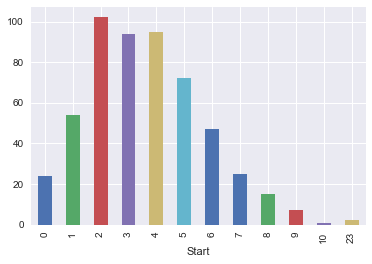

In [5]:
sleep_data['Start'].groupby(sleep_data['Start'].dt.hour).count().plot(kind="bar")

### Conclusion ?

What does the plot show about the sleep pattern ?

Clearly, I should be sleeping earlier. According to this graph, the most common hour I fall asleep is 2 in the morning. However, I should be mindful of bias since I am less likely to initialize the Sleep Cycle app when I’m super tired - as is often the case when I fall asleep before midnight.

### Sleep Duration:

How long slept for when fell asleep. 

Can plot a histogram based on minutes of sleep

In [6]:
sleep_data['Hours_nb']=sleep_data['Time in bed'].astype("datetime64")

In [7]:
# Total numbers of minutes
sleep_data['Minutes_in_bed']=sleep_data['Hours_nb'].dt.hour*60+sleep_data['Hours_nb'].dt.minute
sleep_data['Minutes_in_bed'].head()

0    280
1    311
2    167
3    398
4    295
Name: Minutes_in_bed, dtype: int64

Text(0,0.5,'Frequency')

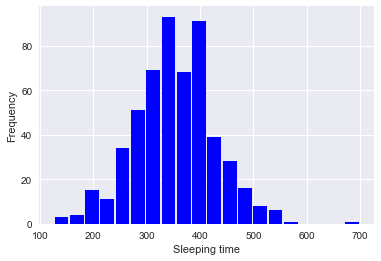

In [8]:
sleep_data['Minutes_in_bed'].plot.hist(bins=20, rwidth=0.9,
                   color='blue')
plt.xlabel('Sleeping time')
plt.ylabel('Frequency')


### Conclusion ?

An approximately normal distribution as expected with the large sample size. On average, I slept about 355 minutes, or 5 hours and 55 minutes per night. Take note that the mean is pulled up by an outlier, the result of a 12 hour hibernation on a warm summer night last year.

### Sleep Duration Over Time:

How has the duration of changed over time ?

__Note that you might want to fit a regression curve to the scatter plot you make !__

__Now modify your plot to include sleep quality as a new dimension !__

In [9]:
# We transform our dataset into time series to see a new kind of plot
sleep_data['Start_day']=sleep_data['Start'].dt.date

In [10]:
sleep_data['Start_day'] = sleep_data['Start_day'].astype("datetime64")
sleep_data['Start_day'].head()

0   2011-06-19
1   2011-06-29
2   2011-06-30
3   2011-07-04
4   2011-07-05
Name: Start_day, dtype: datetime64[ns]

In [11]:
sleep_data.set_index('Start_day').head()

,Start,End,Sleep quality,Time in bed,Wake up,Sleep Notes,Heart rate,Activity (steps),Hours_nb,Minutes_in_bed
Start_day,,,,,,,,,,
2011-06-19,2011-06-19 08:42:08,2011-06-19 13:22:13,51%,4:40,NaN,NaN,NaN,0,2018-12-29 04:40:00,280
2011-06-29,2011-06-29 07:27:53,2011-06-29 12:39:43,57%,5:11,NaN,NaN,NaN,0,2018-12-29 05:11:00,311
2011-06-30,2011-06-30 08:04:06,2011-06-30 10:51:15,34%,2:47,NaN,NaN,NaN,0,2018-12-29 02:47:00,167
2011-07-04,2011-07-04 05:48:35,2011-07-04 12:27:00,73%,6:38,NaN,NaN,NaN,0,2018-12-29 06:38:00,398
2011-07-05,2011-07-05 05:46:29,2011-07-05 10:42:00,51%,4:55,NaN,NaN,NaN,0,2018-12-29 04:55:00,295


In [12]:
sleep_data['Start_year']=sleep_data["Start"].dt.year
sleep_data['Start_month']=sleep_data["Start"].dt.month

In [13]:
ts_sleep=sleep_data[['Start_day','Minutes_in_bed']]

In [14]:
ts_sleep.index = pd.to_datetime(ts_sleep['Start_day'])
ts_sleep.head()

,Start_day,Minutes_in_bed
Start_day,,
2011-06-19,2011-06-19,280
2011-06-29,2011-06-29,311
2011-06-30,2011-06-30,167
2011-07-04,2011-07-04,398
2011-07-05,2011-07-05,295


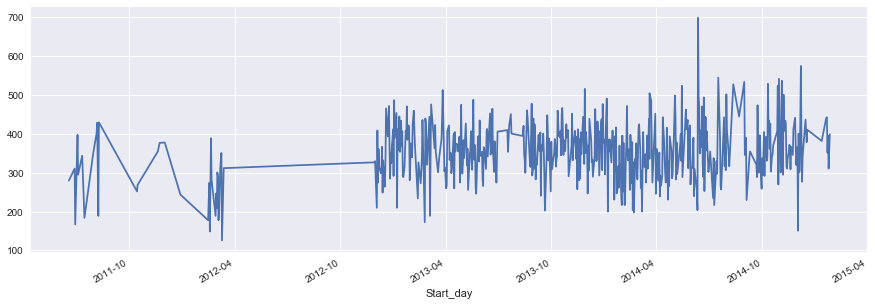

In [15]:
# We create a plot with the year and the month of the sleeping start on x-axis and time in bed in minutes 
# on y-axis as a time series
fig, ax = plt.subplots(figsize=(15,5))
ts_sleep['Minutes_in_bed'].plot()

We got a very weird plot. This is due to the fact there are several months missing in the dataset

Let's see if there is a correlation between the year of the start, the month of the start and the sleep duration

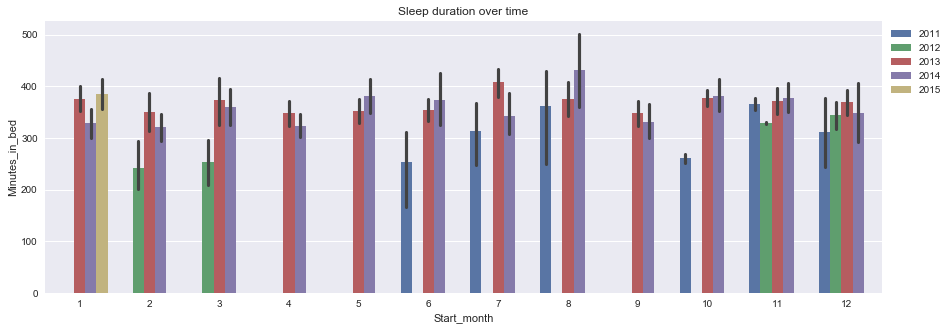

In [16]:
# We create a plot with the year and the month of the sleeping start on x-axis and time in bed in minutes on y-axis
plt.figure(figsize=(15,5))
plt.title('Sleep duration over time')
sb.barplot(x='Start_month', y='Minutes_in_bed',data=sleep_data, hue='Start_year')
plt.legend(bbox_to_anchor=(1, 1), loc=2)

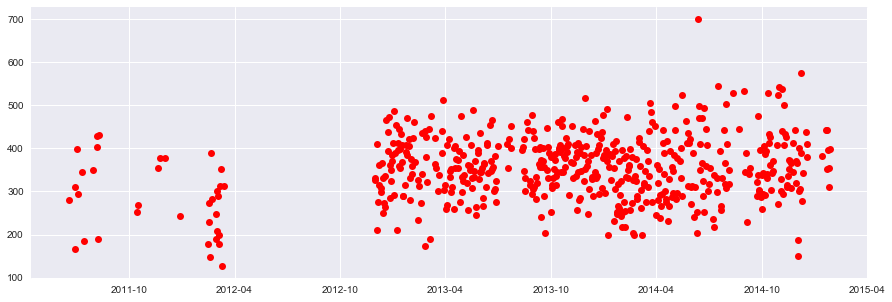

In [17]:
# We create a scattered plot with the sleep duration over time
fig, ax = plt.subplots(figsize=(15,5))
plt.plot_date(sleep_data["Start"], sleep_data["Minutes_in_bed"], c = 'red')

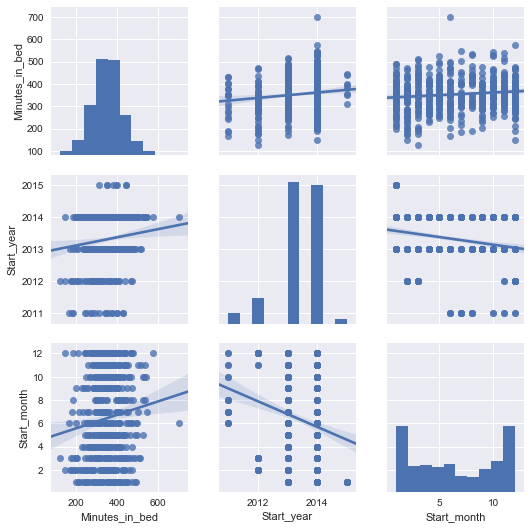

In [18]:
sb.pairplot(sleep_data.drop(['End','Sleep quality','Time in bed','Wake up','Sleep Notes','Heart rate','Activity (steps)','Hours_nb'], axis=1), kind ='reg')

From these scattered plots above, a lot of dots is far away from the regression line and we can't conclude anything

### Conclusion ?

Can you notice any change around August 2013 ?
In August 2013, there don't seem to be any particular changes, either the comparison is between the months of August over the years or either the comparison is with the other months of 2013. But if we look at the histogram, August 2014 is the month when the sleep duration is the longest. However we can see the Sleep Cycle app wasn't activated between March 2012 and November 2012.

### Sleep Quality Over Time:

Sleep Quality is affected by two factors:

    - Total time asleep
    - Amount of movement


Since we don’t have access to the movement data, we can’t verify the relationship between movement and sleep quality. 

However, we can check the relationship between sleep duration and sleep quality. Create a visualization of that !

In [19]:
sleep_data['Sleep_qty']=sleep_data['Sleep quality']
sleep_data['Sleep_qty']=sleep_data['Sleep_qty'].map(lambda x: str(x)[:-1])
sleep_data['Sleep_qty']=sleep_data['Sleep_qty'].astype('float64')

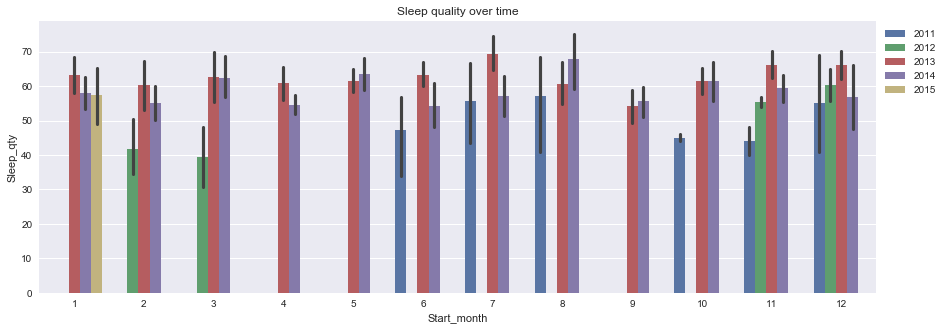

In [20]:
# We create a plot with the year and the month of the sleeping start on x-axis and quality on y-axis
plt.figure(figsize=(15,5))
plt.title('Sleep quality over time')
sb.barplot(x='Start_month', y='Sleep_qty',data=sleep_data, hue='Start_year')
plt.legend(bbox_to_anchor=(1, 1), loc=2)

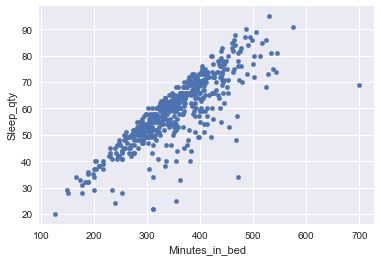

In [21]:
sleep_data.plot(x='Minutes_in_bed',y='Sleep_qty', kind='scatter')

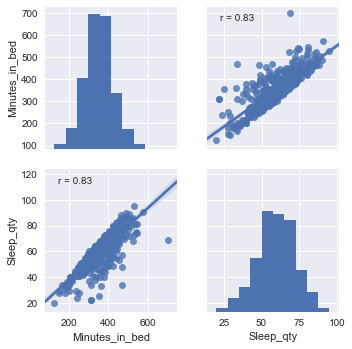

In [22]:
def corrfunc(x, y, **kws):
    ax = plt.gca()
    r, p = stats.pearsonr(x, y)
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .9), xycoords=ax.transAxes)

sb.pairplot(sleep_data.drop(['Start','End','Sleep quality','Time in bed','Wake up','Sleep Notes','Heart rate','Activity (steps)','Hours_nb','Start_year','Start_month'], axis=1), kind ='reg').map_offdiag(corrfunc);

There seems to be a high correlation between the sleep quality and the duration

### Does duration mean quality ?

Given this information, it is possible for sleep quality to increase even when sleep duration decreases, especially if there is less movement in bed ! S


 plot sleep quality over time to find out if this is true !

[Text(0,0,'2011-03-04'),
 Text(0,0,'2011-09-20'),
 Text(0,0,'2012-04-07'),
 Text(0,0,'2012-10-24'),
 Text(0,0,'2013-05-12'),
 Text(0,0,'2013-11-28'),
 Text(0,0,'2014-06-16'),
 Text(0,0,'2015-01-02'),
 Text(0,0,'2015-07-21')]

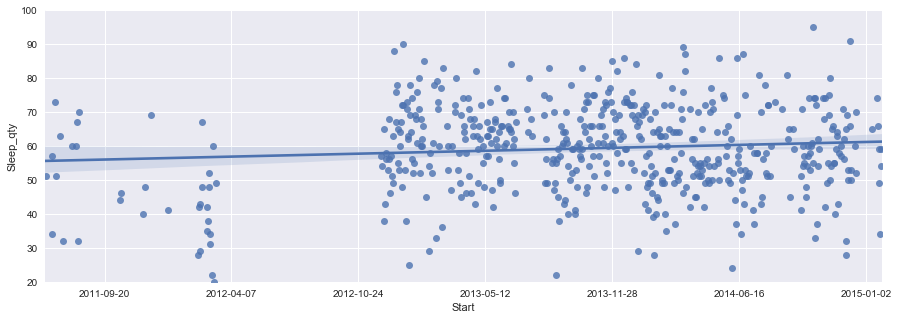

In [23]:
# As Seaborn doesn't like time data as an x-axis, we are using the trick of transforming time data into ordinal data.
# Then we change the labels on x_axis
from datetime import date
sleep_data['start_ordinal'] = pd.to_datetime(sleep_data['Start']).apply(lambda date: date.toordinal())

fig, ax = plt.subplots(figsize=(15,5))
sb.regplot(data=sleep_data, x="start_ordinal", y="Sleep_qty")

ax.set_xlim(sleep_data['start_ordinal'].min()-1, sleep_data['start_ordinal'].max() + 1)
ax.set_ylim(20, 100)


ax.set_xlabel('Start')
new_labels = [date.fromordinal(int(item)) for item in ax.get_xticks()]
ax.set_xticklabels(new_labels)

It seems that the sleep quality tends to increase very slightly over time

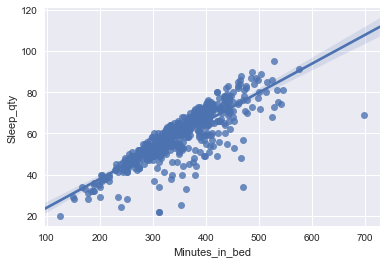

In [24]:
import seaborn as sb
sb.set()
sb.regplot(x=sleep_data["Minutes_in_bed"], y=sleep_data["Sleep_qty"])
# if time is the duration

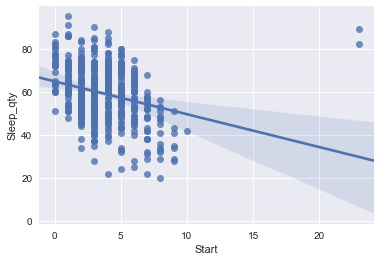

In [25]:
# We create a plot with the sleep quality and the hour of sleep starting
sb.regplot(x=sleep_data["Start"].dt.hour, y=sleep_data["Sleep_qty"])

If we look at the graph above, we can see that the sleep quality tends to decrease if we sleep late in the morning

## Part 2: A similar realistic situation:

- Lets conisder a similar where we have got sleep data from a devices. Expand on what you did above and come with extra analysis of yours. Make conclusions based on your observations

- Download the data: https://www.dropbox.com/s/7fdmc0l3410g8hu/sleep-export2.csv?dl=0

- Here are some extra info you might need:
     - http://developer.samsung.com/health/server/api/data-types/sleep
     - http://developer.samsung.com/onlinedocs/health/index.html?com/samsung/android/sdk/healthdata/HealthConstants.Sleep.html

    - https://currentmillis.com/tutorials/system-currentTimeMillis.html#utc

In [26]:
sleep_data2=pd.read_csv('sleep-export2.csv', delimiter=',')
sleep_data2.head(3)

,Unnamed: 0,efficiency,has_sleep_data,com.samsung.health.sleep.datauuid,quality,com.samsung.health.sleep.custom,com.samsung.health.sleep.end_time,original_wake_up_time,com.samsung.health.sleep.start_time,com.samsung.health.sleep.time_offset,com.samsung.health.sleep.update_time,original_bed_time,com.samsung.health.sleep.create_time,original_efficiency
0,0,92.663040,1.0,03f12ce0-9ade-5c74-9d57-686fd3966f2a,50003.0,NaN,1520501400000,1.520501e+12,1520479380000,UTC-0400,1520516398387,1.520479e+12,1520501522181,92.66304
1,1,87.788020,1.0,0419de25-ff8a-e425-0864-7e83b7f5d991,NaN,NaN,1519565280000,NaN,1519539300000,UTC-0400,1519565416332,NaN,1519565416332,NaN
2,2,90.026955,1.0,048b90e0-1e31-7875-337c-e9d8c24bea59,NaN,NaN,1527932940000,NaN,1527910620000,UTC-0300,1527932972094,NaN,1527932972094,NaN


In [27]:
sleep_data2['com.samsung.health.sleep.time_offset'].groupby(sleep_data2['com.samsung.health.sleep.time_offset']).count()

com.samsung.health.sleep.time_offset
UTC-0300    188
UTC-0400     79
UTC-0700     12
Name: com.samsung.health.sleep.time_offset, dtype: int64

The time offset that the data displays the most is UTC-0300. Since UTC 0000 is in London, we can conclude that the user is mostly living in an area which 3 is hours late from London. This area can be in Greenland, in Canada but in New Brunswick or in Nova Scotia Area or somewhere in South America.

Sometimes the user can go to UTC-0400 which corresponds to most of Quebec and Ontario areas but also in some areas of South America. Finally, he can go to UTC-0700 which corresponds to British Columbia areas or some areas in the USA or in Mexico.

In [28]:
sleep_data2.describe()

,Unnamed: 0,efficiency,has_sleep_data,quality,com.samsung.health.sleep.custom,com.samsung.health.sleep.end_time,original_wake_up_time,com.samsung.health.sleep.start_time,com.samsung.health.sleep.update_time,original_bed_time,com.samsung.health.sleep.create_time,original_efficiency
count,279.000000,279.000000,277.0,38.000000,0.0,2.790000e+02,3.600000e+01,2.790000e+02,2.790000e+02,3.600000e+01,2.790000e+02,36.000000
mean,139.000000,88.857112,1.0,50003.184211,NaN,1.523645e+12,1.518385e+12,1.523624e+12,1.523647e+12,1.518358e+12,1.523646e+12,93.029683
std,80.684571,15.959922,0.0,0.833594,NaN,5.540819e+09,1.429733e+09,5.541843e+09,5.539859e+09,1.429201e+09,5.541025e+09,2.387901
min,0.000000,0.000000,1.0,50001.000000,NaN,1.513425e+12,1.515498e+12,1.513401e+12,1.513426e+12,1.515471e+12,1.513426e+12,85.714290
25%,69.500000,90.314255,1.0,50003.000000,NaN,1.518739e+12,1.517269e+12,1.518707e+12,1.518740e+12,1.517238e+12,1.518739e+12,92.303657
50%,139.000000,92.369480,1.0,50003.000000,NaN,1.524047e+12,1.518214e+12,1.524021e+12,1.524048e+12,1.518190e+12,1.524048e+12,93.088888
75%,208.500000,93.730985,1.0,50004.000000,NaN,1.528496e+12,1.519665e+12,1.528473e+12,1.528496e+12,1.519639e+12,1.528496e+12,94.552854
max,278.000000,97.229920,1.0,50005.000000,NaN,1.532863e+12,1.521107e+12,1.532837e+12,1.532863e+12,1.521082e+12,1.532863e+12,96.572580


In [29]:
# We remove all the columns containing too many missing values
sleep_data2=sleep_data2.drop(['Unnamed: 0','quality','com.samsung.health.sleep.custom','original_wake_up_time','original_bed_time','original_efficiency'],axis=1)

In [30]:
list(sleep_data2.columns.values)

['efficiency',
 'has_sleep_data',
 'com.samsung.health.sleep.datauuid',
 'com.samsung.health.sleep.end_time',
 'com.samsung.health.sleep.start_time',
 'com.samsung.health.sleep.time_offset',
 'com.samsung.health.sleep.update_time',
 'com.samsung.health.sleep.create_time']

In [31]:
# Let's calculate the date taking account of the time offset. Let's convert the time offset in milliseconds
sleep_data2.loc[sleep_data2['com.samsung.health.sleep.time_offset']=='UTC-0300', 'offset'] = -3*60*60*1000
sleep_data2.loc[sleep_data2['com.samsung.health.sleep.time_offset']=='UTC-0400', 'offset'] = -4*60*60*1000
sleep_data2.loc[sleep_data2['com.samsung.health.sleep.time_offset']=='UTC-0700', 'offset'] = -7*60*60*1000
sleep_data2.offset.head()

0   -14400000.0
1   -14400000.0
2   -10800000.0
3   -10800000.0
4   -14400000.0
Name: offset, dtype: float64

In [32]:
# Let's convert all the dates into UTC-0000
sleep_data2['start'] = pd.to_datetime(((sleep_data2['com.samsung.health.sleep.start_time']+sleep_data2['offset'])/1000), unit='s')
sleep_data2['start'].sort_values().head(5)

26    2017-12-16 01:02:00
175   2017-12-17 23:31:00
43    2017-12-19 23:55:00
116   2017-12-22 01:57:00
167   2017-12-23 02:48:00
Name: start, dtype: datetime64[ns]

In [33]:
# We create a column with dates without the hours for the start and the end of sleep
sleep_data2['start_date']=sleep_data2['start'].dt.date
sleep_data2['start_date']=sleep_data2['start_date'].astype("datetime64")
sleep_data2['start_date'].head()

0   2018-03-07
1   2018-02-25
2   2018-06-02
3   2018-06-23
4   2018-01-05
Name: start_date, dtype: datetime64[ns]

In [34]:
sleep_data2['end'] = pd.to_datetime(((sleep_data2['com.samsung.health.sleep.end_time']+sleep_data2['offset'])/1000), unit='s')
sleep_data2['end'].head(5)

0   2018-03-08 05:30:00
1   2018-02-25 09:28:00
2   2018-06-02 06:49:00
3   2018-06-23 07:32:00
4   2018-01-05 09:41:00
Name: end, dtype: datetime64[ns]

In [35]:
sleep_data2['end_date']=sleep_data2['end'].dt.date
sleep_data2['end_date']=sleep_data2['end_date'].astype("datetime64")
sleep_data2['end_date'].head()

0   2018-03-08
1   2018-02-25
2   2018-06-02
3   2018-06-23
4   2018-01-05
Name: end_date, dtype: datetime64[ns]

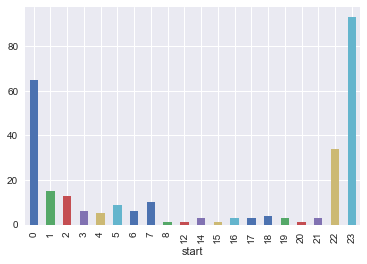

In [36]:
# We create a plot with the differents hours of sleep starting
sleep_data2['start'].groupby(sleep_data2['start'].dt.hour).count().plot(kind="bar")

### Conclusion

The most common sleep hour with this dataset would be 3 hours if we don't take the time offset into account. With the time offset taken in account, it seems the user mostly tends to sleep at 23 hours which seems to be more realistic.

In [37]:
sleep_data2['time in bed']=sleep_data2['end']-sleep_data2['start']

In [38]:
import numpy as np
sleep_data2['Minutes_in_bed']=sleep_data2['time in bed']/np.timedelta64(1,'m')
sleep_data2['Minutes_in_bed'].head()

0    367.0
1    433.0
2    372.0
3    233.0
4    527.0
Name: Minutes_in_bed, dtype: float64

Text(0,0.5,'Frequency')

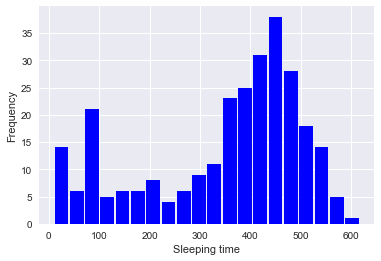

In [39]:
sleep_data2['Minutes_in_bed'].plot.hist(bins=20, rwidth=0.9,
                   color='blue')
plt.xlabel('Sleeping time')
plt.ylabel('Frequency')

### Conclusion

The most common sleeping time is about 450 minutes. It seems to be a non-normal distribution as there are many outliers with duration lower than 100 minutes. On the other hand, the sample is smaller than in the previous part. Now let's see what happens when we separate power naps and others scattered data from the rest.

In [40]:
# We look at the possible duplicates in the data for the same day
count_sleep=pd.DataFrame(sleep_data2['start_date'].groupby(sleep_data2['start_date']).count())
count_sleep.columns=['ct_sleep']
pls_sleep=count_sleep.reset_index()

In [41]:
sleep_data3=pd.merge(sleep_data2,pls_sleep, on='start_date')
sleep_data3[(sleep_data3['ct_sleep']==3)].sort_values(by='start_date').head()

,efficiency,has_sleep_data,com.samsung.health.sleep.datauuid,com.samsung.health.sleep.end_time,com.samsung.health.sleep.start_time,com.samsung.health.sleep.time_offset,com.samsung.health.sleep.update_time,com.samsung.health.sleep.create_time,offset,start,start_date,end,end_date,time in bed,Minutes_in_bed,ct_sleep
183,0.000000,1.0,78d01a70-9f6d-3a94-505a-dfc6bdb18ed2,1514955900000,1514955300000,UTC-0400,1514956788280,1514956788280,-14400000.0,2018-01-03 00:55:00,2018-01-03,2018-01-03 01:05:00,2018-01-03,00:10:00,10.0,3
185,94.857150,1.0,c951e281-e034-5cda-9119-110eabd0557e,1514980020000,1514959080000,UTC-0400,1514980932286,1514980932286,-14400000.0,2018-01-03 01:58:00,2018-01-03,2018-01-03 07:47:00,2018-01-03,05:49:00,349.0,3
184,0.000000,1.0,ad17d745-a7bd-5a6b-f886-b9c2b6b77dd0,1514957880000,1514956920000,UTC-0400,1514958797298,1514958797298,-14400000.0,2018-01-03 01:22:00,2018-01-03,2018-01-03 01:38:00,2018-01-03,00:16:00,16.0,3
39,91.304350,1.0,19b915d4-de22-a8d8-f5a0-4b58d6431e28,1515333660000,1515324060000,UTC-0400,1515334559770,1515334559770,-14400000.0,2018-01-07 07:21:00,2018-01-07,2018-01-07 10:01:00,2018-01-07,02:40:00,160.0,3
40,90.909096,1.0,b4abd414-d8af-7e40-2f3e-3d2afafd5c86,1515315480000,1515300360000,UTC-0400,1515316354278,1515316354278,-14400000.0,2018-01-07 00:46:00,2018-01-07,2018-01-07 04:58:00,2018-01-07,04:12:00,252.0,3


Indeed, there are days where the individual sleeps at different times. But these are not duplicates. Sometimes during the night the individual's sleep is interrupted and the individual started sleeping again from a few minutes to one or two hours after this interruption during the night. He can also sleep after midnight.
So let's separate day power naps from night regular sleeps. We etablished that the power naps happen between 11:00 and 19:00.

In [42]:
is_power_nap=(sleep_data3['start'].dt.hour>=11)&(sleep_data3['start'].dt.hour<=20)

In [43]:
s=sleep_data3.loc[(is_power_nap==False)]
sleep_data4=s.drop(['com.samsung.health.sleep.datauuid','com.samsung.health.sleep.end_time','com.samsung.health.sleep.update_time','com.samsung.health.sleep.start_time','com.samsung.health.sleep.time_offset','com.samsung.health.sleep.create_time','offset'],axis=1)
sleep_data4.sort_values(by='start_date').head()

,efficiency,has_sleep_data,start,start_date,end,end_date,time in bed,Minutes_in_bed,ct_sleep
44,94.902916,1.0,2017-12-16 01:02:00,2017-12-16,2017-12-16 07:53:00,2017-12-16,06:51:00,411.0,1
225,96.341460,1.0,2017-12-17 23:31:00,2017-12-17,2017-12-18 07:42:00,2017-12-18,08:11:00,491.0,1
64,93.174065,1.0,2017-12-19 23:55:00,2017-12-19,2017-12-20 04:48:00,2017-12-20,04:53:00,293.0,1
156,91.434265,1.0,2017-12-22 01:57:00,2017-12-22,2017-12-22 10:18:00,2017-12-22,08:21:00,501.0,1
180,94.117645,1.0,2017-12-23 22:31:00,2017-12-23,2017-12-24 07:17:00,2017-12-24,08:46:00,526.0,2


In [44]:
regul_sleep=pd.DataFrame(sleep_data4.groupby(['start_date','end_date'],as_index=False).agg({'Minutes_in_bed': "sum",
                                     'efficiency': "mean"}))
regul_sleep.sort_values(by='start_date').head()

,start_date,end_date,Minutes_in_bed,efficiency
0,2017-12-16,2017-12-16,411.0,94.902916
1,2017-12-17,2017-12-18,491.0,96.341460
2,2017-12-19,2017-12-20,293.0,93.174065
3,2017-12-22,2017-12-22,501.0,91.434265
4,2017-12-23,2017-12-23,322.0,93.188850


[Text(0,0,'2017-11-17'),
 Text(0,0,'2018-01-06'),
 Text(0,0,'2018-02-25'),
 Text(0,0,'2018-04-16'),
 Text(0,0,'2018-06-05'),
 Text(0,0,'2018-07-25'),
 Text(0,0,'2018-09-13')]

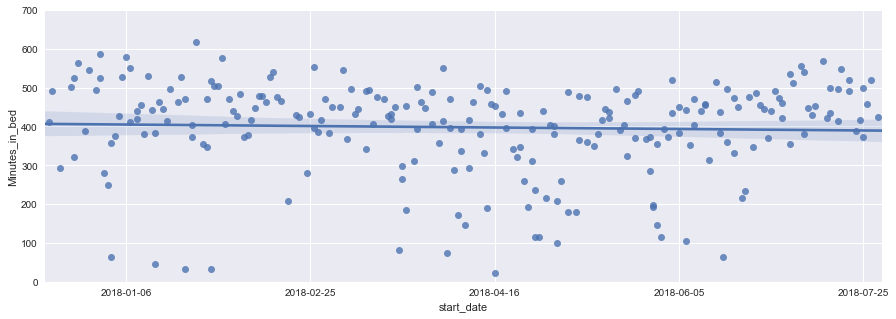

In [45]:
from datetime import date
regul_sleep['start_ordinal'] = pd.to_datetime(regul_sleep['start_date']).apply(lambda date: date.toordinal())

fig, ax = plt.subplots(figsize=(15,5))
sb.regplot(data=regul_sleep, x="start_ordinal", y="Minutes_in_bed")

ax.set_xlim(regul_sleep['start_ordinal'].min()-1, regul_sleep['start_ordinal'].max() + 1)
ax.set_ylim(0, 700)


ax.set_xlabel('start_date')
new_labels = [date.fromordinal(int(item)) for item in ax.get_xticks()]
ax.set_xticklabels(new_labels)

With the Samsung dataset the user tends to sleep less than in the part 1. Sleep duration tends to decrease very slightly over the time.

[Text(0,0,'2017-11-17'),
 Text(0,0,'2018-01-06'),
 Text(0,0,'2018-02-25'),
 Text(0,0,'2018-04-16'),
 Text(0,0,'2018-06-05'),
 Text(0,0,'2018-07-25'),
 Text(0,0,'2018-09-13')]

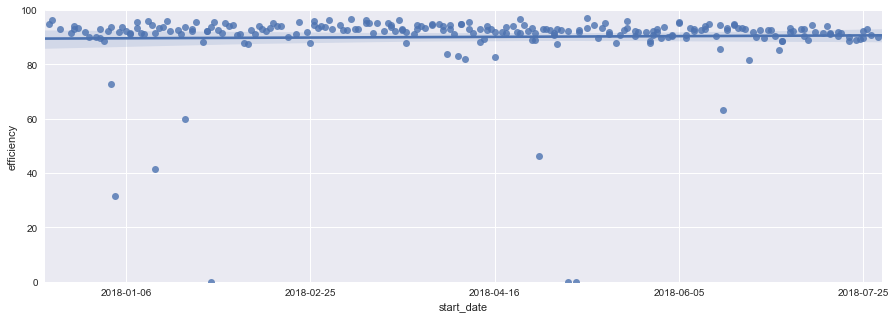

In [46]:
from datetime import date
regul_sleep['start_ordinal'] = pd.to_datetime(regul_sleep['start_date']).apply(lambda date: date.toordinal())

fig, ax = plt.subplots(figsize=(15,5))
sb.regplot(data=regul_sleep, x="start_ordinal", y="efficiency")

ax.set_xlim(regul_sleep['start_ordinal'].min()-1, regul_sleep['start_ordinal'].max() + 1)
ax.set_ylim(0, 100)


ax.set_xlabel('start_date')
new_labels = [date.fromordinal(int(item)) for item in ax.get_xticks()]
ax.set_xticklabels(new_labels)

After removing most of the outliers, the efficiency is more than 85% and is constant over the time.

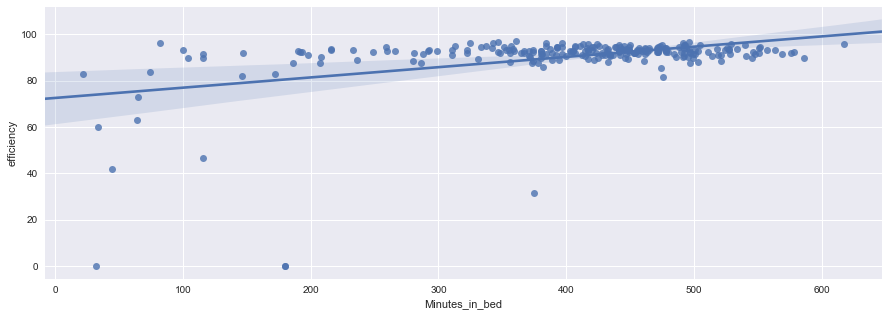

In [47]:
fig, ax = plt.subplots(figsize=(15,5))
sb.regplot(x=regul_sleep["Minutes_in_bed"], y=regul_sleep["efficiency"])
# We use the sleep duration in minutes

The longer is the duration, the better is the sleep quality

Text(0,0.5,'Frequency')

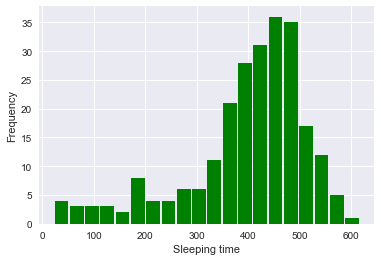

In [48]:
regul_sleep['Minutes_in_bed'].plot.hist(bins=20, rwidth=0.9,
                   color='green')
plt.xlabel('Sleeping time')
plt.ylabel('Frequency')

Even after removing the scattered data and all the data before 2018, there are some outliers remaining. This confirms there are nights when the user sleeps for less than 200 minutes which is a short duration.

Now let's make a comparison between the days of the week.

In [49]:
regul_sleep['week_day'] = regul_sleep['start_date'].dt.weekday_name

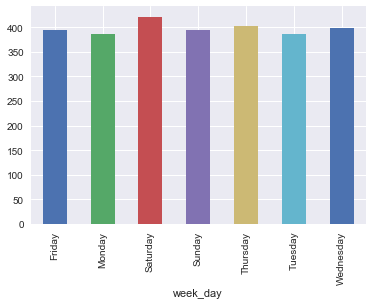

In [50]:
regul_sleep['Minutes_in_bed'].groupby(regul_sleep['week_day']).mean().plot(kind='bar')

Saturday seems to be the day the user sleeps the most

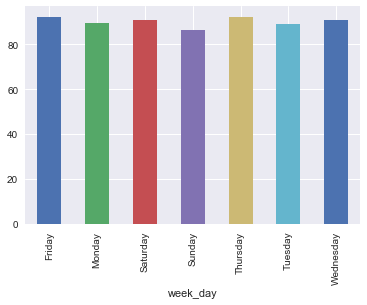

In [51]:
regul_sleep['efficiency'].groupby(regul_sleep['week_day']).mean().plot(kind='bar')

Friday seems to be the day of the week when the sleep quality is the best.

## Part 3 : Exercise

In [52]:
exercise_data=pd.read_csv('exercise.csv',delimiter=',')

In [53]:
exercise_data.describe()

,Unnamed: 0,altitude_loss,max_altitude,count,altitude_gain,exercise_custom_type,duration,max_heart_rate,max_rpm,mean_heart_rate,...,calorie,mean_cadence,mean_speed,min_altitude,min_heart_rate,count_type,max_caloricburn_rate,custom,additional,distance
count,341.000000,7.000000,10.000000,36.000000,7.000000,0.0,3.410000e+02,219.000000,0.0,219.000000,...,341.000000,220.000000,329.000000,10.000000,219.000000,36.000000,0.0,0.0,0.0,329.000000
mean,170.000000,38.783013,183.939811,197.361111,62.137751,NaN,1.330149e+06,35.474886,NaN,26.150685,...,117.668930,2.013681,1.062548,142.840325,16.666667,30003.750000,NaN,NaN,NaN,1001.475395
std,98.582453,36.599969,169.664232,857.400961,54.533665,NaN,9.227667e+05,71.981350,NaN,52.674613,...,98.100956,17.193378,0.801797,136.545444,33.875288,0.840918,NaN,NaN,NaN,916.099907
min,0.000000,0.000000,-112.719000,0.000000,1.343596,NaN,8.011000e+03,0.000000,NaN,0.000000,...,0.715000,0.000000,0.000000,-138.032000,0.000000,30001.000000,NaN,NaN,NaN,0.000000
25%,85.000000,12.029713,87.527300,0.000000,30.792457,NaN,7.189580e+05,0.000000,NaN,0.000000,...,53.630000,0.000000,1.035461,68.284945,0.000000,30004.000000,NaN,NaN,NaN,701.459000
50%,170.000000,26.255226,167.660200,0.000000,64.041130,NaN,8.956540e+05,0.000000,NaN,0.000000,...,70.470000,0.000000,1.254611,146.954030,0.000000,30004.000000,NaN,NaN,NaN,891.770000
75%,255.000000,60.286065,266.746000,0.000000,69.210705,NaN,1.800000e+06,0.000000,NaN,0.000000,...,153.250000,0.000000,1.393100,226.806500,0.000000,30004.000000,NaN,NaN,NaN,1127.080000
max,340.000000,100.594310,525.210100,4525.000000,169.573210,NaN,5.363575e+06,220.000000,NaN,167.000000,...,475.419000,159.554930,10.714286,342.523250,116.000000,30004.000000,NaN,NaN,NaN,6279.134000


In [54]:
exercise_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 39 columns):
Unnamed: 0               341 non-null int64
end_time                 341 non-null object
altitude_loss            7 non-null float64
max_altitude             10 non-null float64
start_time               341 non-null object
count                    36 non-null float64
altitude_gain            7 non-null float64
exercise_custom_type     0 non-null float64
duration                 341 non-null int64
deviceuuid               341 non-null object
max_heart_rate           219 non-null float64
max_rpm                  0 non-null float64
mean_heart_rate          219 non-null float64
pkg_name                 341 non-null object
max_cadence              220 non-null float64
time_offset              341 non-null object
mean_caloricburn_rate    0 non-null float64
incline_distance         51 non-null float64
exercise_type            341 non-null int64
decline_distance         51 non-null float64


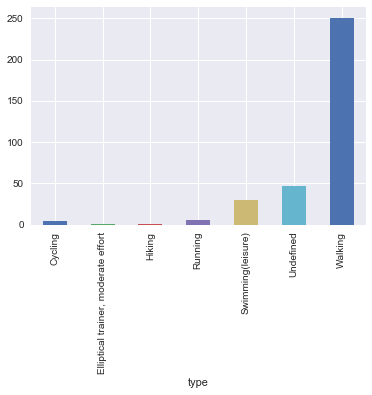

In [55]:
# We add a column which clearly indicates the type of activity the individual did in the day
exercise_data.loc[exercise_data['exercise_type']==0, 'type'] = 'Undefined'
exercise_data.loc[exercise_data['exercise_type']==1001, 'type'] = 'Walking'
exercise_data.loc[exercise_data['exercise_type']==1002, 'type'] = 'Running'
exercise_data.loc[exercise_data['exercise_type']==11007, 'type'] = 'Cycling'
exercise_data.loc[exercise_data['exercise_type']==13001, 'type'] = 'Hiking'
exercise_data.loc[exercise_data['exercise_type']==14001, 'type'] = 'Swimming(leisure)'
exercise_data.loc[exercise_data['exercise_type']==15006, 'type'] = 'Elliptical trainer, moderate effort'
exercise_data['type'].groupby(exercise_data['type']).count().plot(kind='bar')

The activity the user is practicing the most is walking

In [56]:
exercise_data['start_time'] = exercise_data['start_time'].astype("datetime64")
exercise_data['end_time'] = exercise_data['end_time'].astype("datetime64")

In [57]:
exercise_data['time_offset'].groupby(exercise_data['time_offset']).count()

time_offset
UTC-0300    158
UTC-0400    163
UTC-0600      4
UTC-0700     16
Name: time_offset, dtype: int64

In [58]:
# Let's convert all the dates into UTC-0000
exercise_data.loc[exercise_data['time_offset']=='UTC-0300', 'start'] = exercise_data['start_time']-timedelta(hours=3)
exercise_data.loc[exercise_data['time_offset']=='UTC-0400', 'start'] = exercise_data['start_time']-timedelta(hours=4)
exercise_data.loc[exercise_data['time_offset']=='UTC-0600', 'start'] = exercise_data['start_time']-timedelta(hours=6)
exercise_data.loc[exercise_data['time_offset']=='UTC-0700', 'start'] = exercise_data['start_time']-timedelta(hours=7)
exercise_data.start.head()

0   2018-04-07 14:26:10.149
1   2018-01-27 05:38:00.000
2   2018-05-01 15:01:24.059
3   2018-02-24 09:35:13.243
4   2018-03-16 14:15:20.192
Name: start, dtype: datetime64[ns]

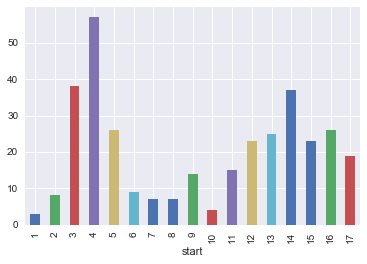

In [59]:
exercise_data['start'].groupby(exercise_data['start'].dt.hour).count().plot(kind="bar")

The most common hour of starting exercise is four hours. This hour is too weird. Maybe recalculating time in this case wasn't necessary.

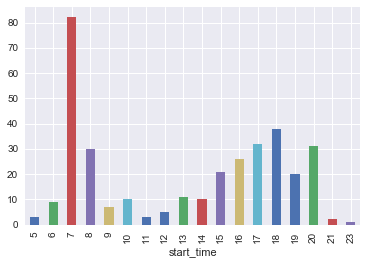

In [60]:
exercise_data['start_time'].groupby(exercise_data['start_time'].dt.hour).count().plot(kind="bar")

Taking the start hour as it was without any recalculation, the most common hour of starting is seven hours which seems to be more likely.

In [61]:
# Total numbers of minutes
exercise_data['duration_in_min']=round(exercise_data['duration']/60000)
exercise_data['duration_in_min'].head()

0    15.0
1    30.0
2    11.0
3    15.0
4    10.0
Name: duration_in_min, dtype: float64

Text(0,0.5,'Frequency')

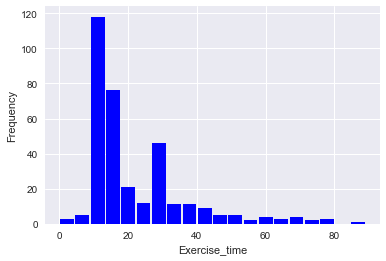

In [62]:
exercise_data['duration_in_min'].plot.hist(bins=20, rwidth=0.9,
                   color='blue')
plt.xlabel('Exercise_time')
plt.ylabel('Frequency')

The most common duration is 15 minutes

In [63]:
exercise_data['week_day'] = exercise_data['start_time'].dt.weekday_name

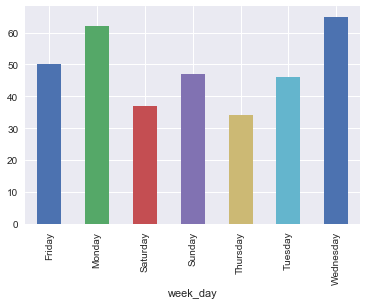

In [64]:
exercise_data['type'].groupby(exercise_data['week_day']).count().plot(kind='bar')

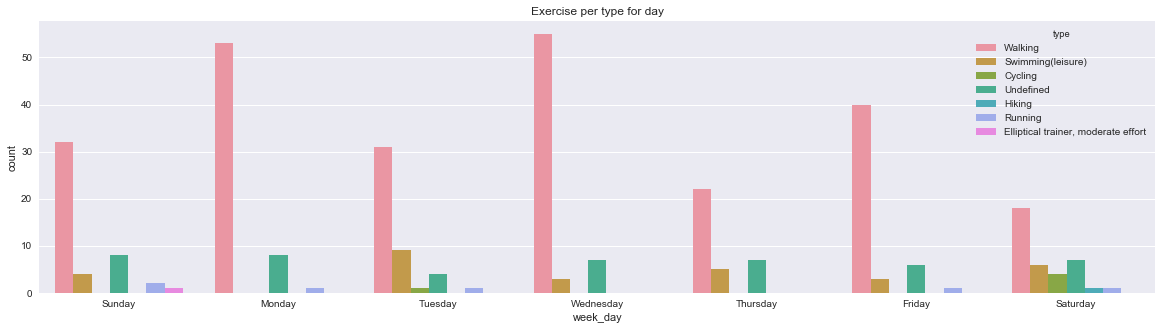

In [65]:
plt.figure(figsize=(20,5))
plt.title('Exercise per type for day')
sb.countplot(x='week_day',data=exercise_data, hue='type',order = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])

The day of the week when the device user is doing exercise the most is Wednesday, especially the walking activity

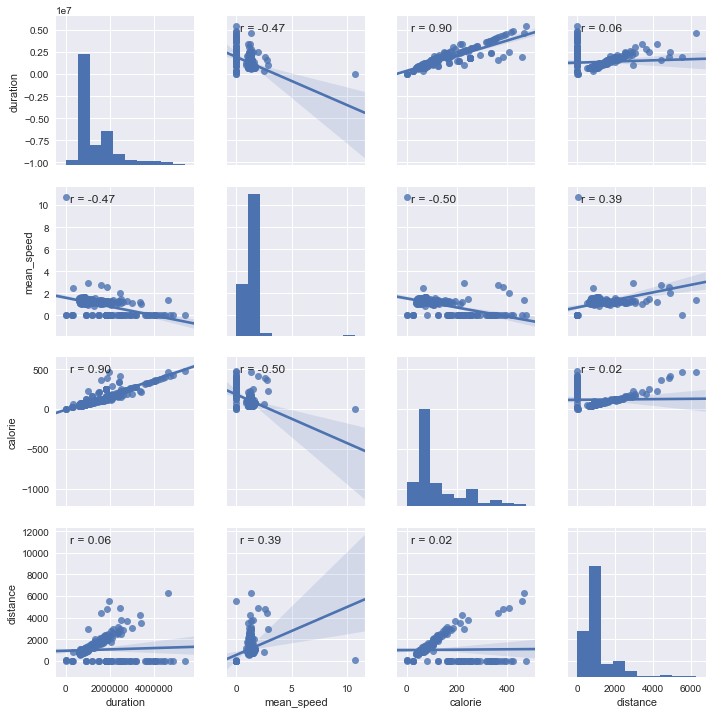

In [66]:
exerc_df = pd.DataFrame(exercise_data, columns=['start_time','duration','mean_speed', 'calorie','distance','deviceuuid'])
ex_df=exerc_df.dropna(axis=0)
sb.pairplot(ex_df, kind ='reg').map_offdiag(corrfunc);

There is a strong correlation between the duration of exercise and the number of calories. We can also see a high negative correlation between the mean speed and the number of calories. Therefore the number of calories decreases when the mean speed or duration increases.

In [67]:
exercise_data['duration_in_min'].groupby(exercise_data['deviceuuid']).count()

deviceuuid
F/D7+hL5E5    219
jQfnryI8/B    122
Name: duration_in_min, dtype: int64

The user is using two types of device to measure his activity.

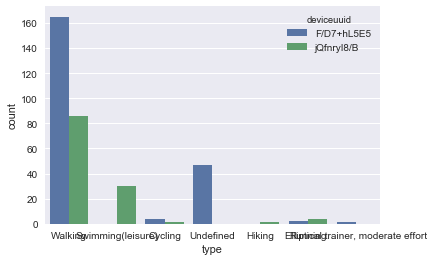

In [68]:
sb.countplot(x='type',data=exercise_data, hue='deviceuuid')

Regardless the type of activity, the F/D7+hL5E5 device is the most used device.

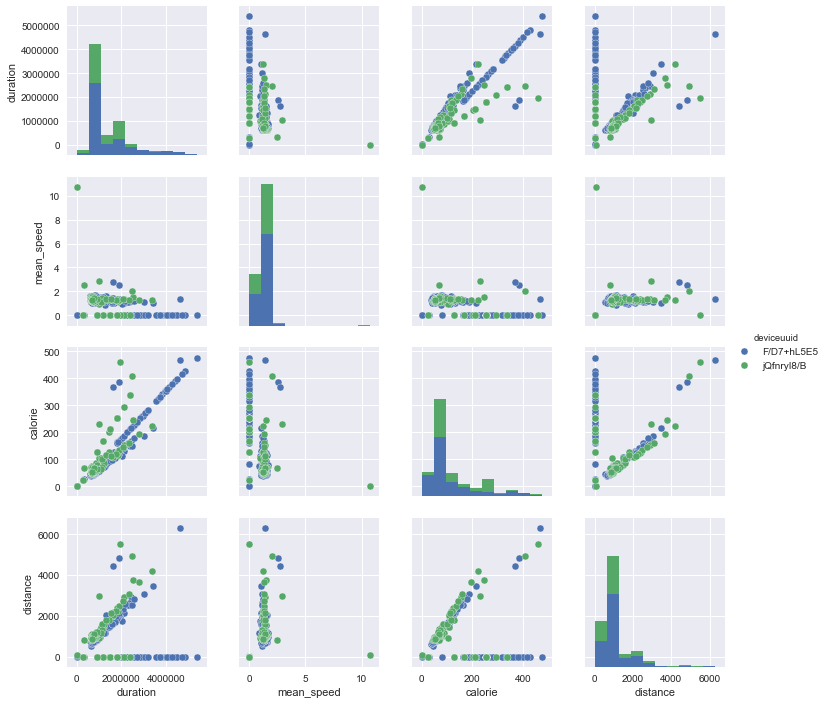

In [69]:
sb.pairplot(hue = 'deviceuuid', data = ex_df)

Unexpectedly jQfnryI8/B is the device giving the best results of activity.

## Part 4 : Analysis from heart rate, step count and floor

### Heart rate

In [70]:
import pandas as pd
heart = pd.read_csv('heart_rate.csv', parse_dates=['start_time','end_time'])
step_count = pd.read_csv('step_count.csv', parse_dates=['start_time','end_time'])
floor = pd.read_csv('floors_climbed.csv', parse_dates=['start_time','end_time'])
summary_data = pd.read_csv('summary.csv')

In [71]:
heart.sort_values(by='start_time').head(3)

,Unnamed: 0,end_time,heart_rate,binning_data,start_time,heart_beat_count,update_time,max,min,pkg_name,time_offset,datauuid,create_time
230,230,1969-12-31 19:00:00.000,47.0,NaN,1969-12-31 19:00:00.000,1,2017-12-16 07:10:28.910,0.0,0.0,com.sec.android.app.shealth,UTC-0400,b6606628-dba6-9605-8445-3dc3f01d0d2f,2017-12-16 07:10:28.910
123,123,1969-12-31 19:00:00.000,49.0,NaN,1969-12-31 19:00:00.000,1,2017-12-15 22:40:29.683,0.0,0.0,com.sec.android.app.shealth,UTC-0400,623edb63-514f-b3b1-d7a9-d6a42567e8e2,2017-12-15 22:40:29.683
41,41,2016-06-09 14:41:09.456,52.0,NaN,2016-06-09 14:41:04.783,0,2016-06-09 14:41:38.226,NaN,NaN,com.sec.android.app.shealth,UTC+0530,24e78fa7-6904-4c9f-9c66-5ae7ab35edb0,2016-06-09 14:41:38.226


In [72]:
heart.describe()

,Unnamed: 0,heart_rate,heart_beat_count,max,min
count,311.000000,311.000000,311.000000,294.000000,294.000000
mean,155.000000,64.527331,0.845659,7.370748,7.367347
std,89.922189,18.870143,0.361857,21.643449,21.637119
min,0.000000,45.000000,0.000000,0.000000,0.000000
25%,77.500000,54.000000,1.000000,0.000000,0.000000
50%,155.000000,60.000000,1.000000,0.000000,0.000000
75%,232.500000,68.000000,1.000000,0.000000,0.000000
max,310.000000,169.000000,1.000000,118.000000,118.000000


In [73]:
# Let's convert all the dates into UTC-0000
heart.loc[heart['time_offset']=='UTC-0300', 'start'] = heart['start_time']-timedelta(hours=3)
heart.loc[heart['time_offset']=='UTC-0400', 'start'] = heart['start_time']-timedelta(hours=4)
heart.loc[heart['time_offset']=='UTC-0700', 'start'] = heart['start_time']-timedelta(hours=7)
heart.start.head()

0   2017-12-16 00:30:29.450
1   2017-12-16 01:50:29.380
2   2017-12-29 19:08:16.211
3   2018-01-15 10:47:37.175
4   2017-12-15 22:20:29.470
Name: start, dtype: datetime64[ns]

Text(0,0.5,'Frequency')

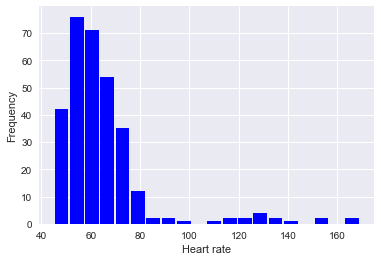

In [74]:
# We plot the heart rate frequency with a histogram
heart['heart_rate'].plot.hist(bins=20, rwidth=0.9,
                   color='blue')
plt.xlabel('Heart rate')
plt.ylabel('Frequency')

It seems to be a normal distribution eventhough there are some outliers. The most common heart rate is about 55 beats per minute.

### Step count

In [75]:
step_count.head()

,Unnamed: 0,end_time,start_time,count,calorie,update_time,speed,pkg_name,time_offset,distance,datauuid,create_time
0,0,2018-04-30 18:21:59.999,2018-04-30 18:21:00,101,4.29,2018-04-30 18:35:00.291,1.527778,com.sec.android.app.shealth,UTC-0300,78.42,0001af94-3253-4fec-0efc-153d3a8a2441,2018-04-30 18:35:00.290
1,1,2018-04-13 19:47:59.999,2018-04-13 19:47:00,25,0.96,2018-04-13 19:55:00.251,1.027778,com.sec.android.app.shealth,UTC-0300,14.36,0001c2a5-c751-4c86-456f-179d46bd29a9,2018-04-13 19:55:00.251
2,2,2018-04-02 10:01:59.999,2018-04-02 10:01:00,38,1.53,2018-04-02 10:14:58.210,1.194444,com.sec.android.app.shealth,UTC-0300,24.19,0003c0db-c795-1f80-17a4-582751b3a2ba,2018-04-02 10:14:58.209
3,3,2018-04-27 10:52:59.999,2018-04-27 10:52:00,35,1.45,2018-04-27 10:55:01.281,1.500000,com.sec.android.app.shealth,UTC-0300,27.45,0006c29c-72a3-b207-069e-b098a9f96252,2018-04-27 10:55:01.280
4,4,2018-04-21 13:47:00.000,2018-04-21 13:46:00,0,0.00,2018-04-21 13:46:36.801,0.000000,com.sec.android.app.shealth,UTC-0300,0.00,001e163d-0af5-4e9a-b7c9-a9ceb6ca5e8c,2018-04-21 13:46:36.801


In [76]:
step_count.describe()

,Unnamed: 0,count,calorie,speed,distance
count,9758.000000,9758.000000,9758.000000,9758.000000,9758.000000
mean,4878.500000,53.960955,2.325148,1.423527,39.683396
std,2817.036297,34.789757,1.624518,0.380431,26.503004
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2439.250000,23.000000,0.950000,1.194444,16.360000
50%,4878.500000,45.000000,1.910000,1.405377,33.015000
75%,7317.750000,87.000000,3.640000,1.583333,61.577500
max,9757.000000,163.000000,16.020000,6.944445,176.750000


In [77]:
step_count['time_offset'].groupby(step_count['time_offset']).count()

time_offset
UTC-0300    9758
Name: time_offset, dtype: int64

In [78]:
step_count['start'] = (step_count['start_time'].astype("datetime64"))-timedelta(hours=3)
step_count['end'] = (step_count['end_time'].astype("datetime64"))-timedelta(hours=3)

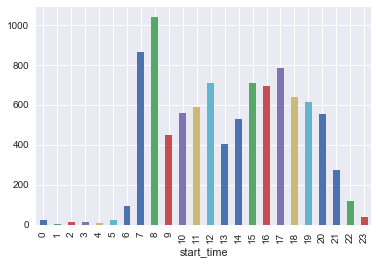

In [79]:
step_count['start_time'].groupby(step_count['start_time'].dt.hour).count().plot(kind="bar")

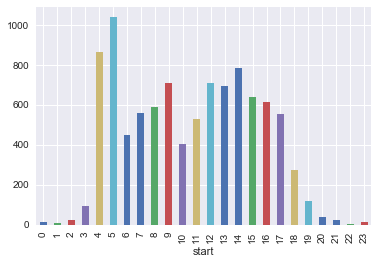

In [80]:
step_count['start'].groupby(step_count['start'].dt.hour).count().plot(kind="bar")

Surprisingly whether we take the time offset into account or not, the most frequent start of measurement seems to be weird (5:00 without recalculation of time offset, 2:00 with recalculation.

Text(0,0.5,'Frequency')

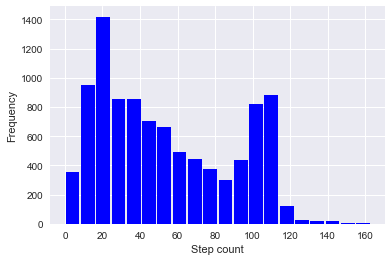

In [81]:
step_count['count'].plot.hist(bins=20, rwidth=0.9,
                   color='blue')
plt.xlabel('Step count')
plt.ylabel('Frequency')

In [82]:
# Total numbers of seconds for step data
step_count['duration']=step_count['end_time']-step_count['start_time']
step_count['step_seconds']=step_count['duration'].dt.seconds
step_count['step_seconds'].mean()

59.37118261938922

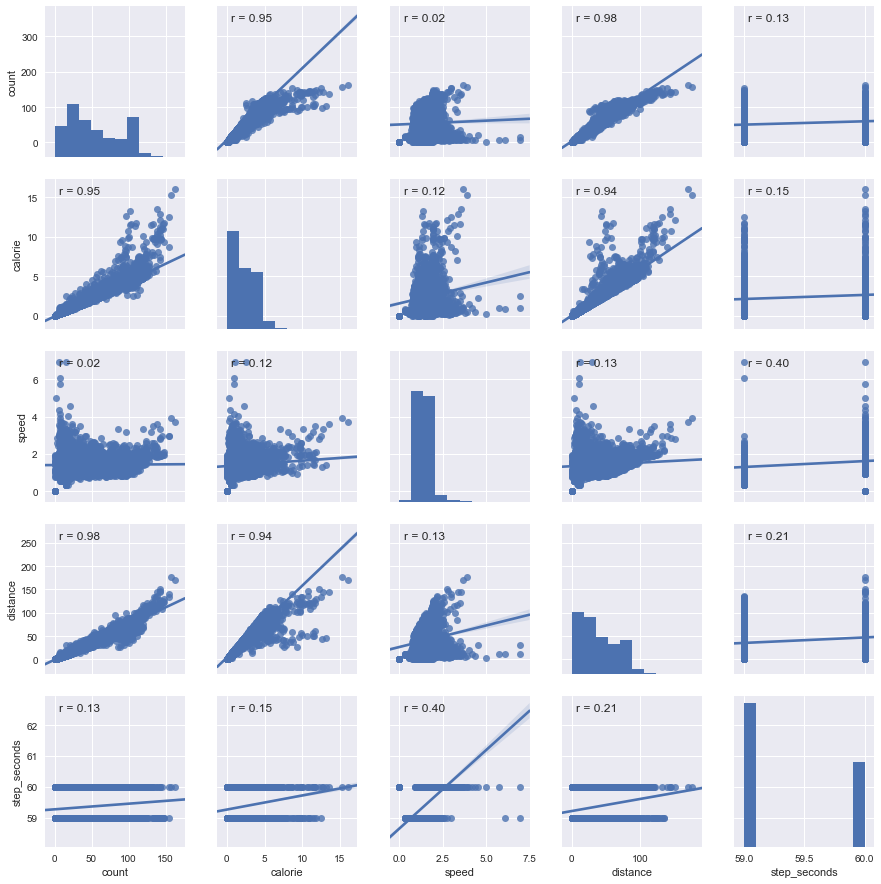

In [83]:
def corrfunc(x, y, **kws):
    ax = plt.gca()
    r, p = stats.pearsonr(x, y)
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .9), xycoords=ax.transAxes)

sb.pairplot(step_count.drop(['Unnamed: 0','end_time','start_time','update_time','pkg_name','time_offset','datauuid','create_time','duration'], axis=1), kind ='reg').map_offdiag(corrfunc);

According to the plots above, three strong correlations can be seen :

- one between the number of steps and the distance
- another the distance and the number of burned calories
- the number of steps and the number of burned calories

### Floor climbing

In [84]:
floor.head()

,Unnamed: 0,end_time,pkg_name,time_offset,start_time,floor,datauuid,update_time,create_time
0,0,2018-01-24 21:30:56,com.sec.android.app.shealth,UTC-0400,2018-01-24 21:29:51,2.0,00443274-6e30-97f9-3eb2-75d17f3e766f,2018-01-24 21:34:47.756,2018-01-24 21:34:47.720
1,1,2018-03-27 21:04:27,com.sec.android.app.shealth,UTC-0300,2018-03-27 21:04:01,1.0,00ed787d-a38b-8fcf-886d-b15a30e02ff6,2018-03-27 21:11:51.606,2018-03-27 21:11:51.606
2,2,2018-02-12 07:40:16,com.sec.android.app.shealth,UTC-0400,2018-02-12 07:38:21,2.0,012ee314-b5de-8ac7-0421-c634e858ebc4,2018-02-12 07:41:27.854,2018-02-12 07:41:27.802
3,3,2018-03-16 17:17:22,com.sec.android.app.shealth,UTC-0300,2018-03-16 17:17:05,1.0,016876d6-2d1f-5514-a6c2-12b580e0654c,2018-03-16 17:22:41.066,2018-03-16 17:22:41.044
4,4,2018-01-22 15:50:38,com.sec.android.app.shealth,UTC-0400,2018-01-22 15:50:22,1.0,01c24d32-905b-9f65-732e-3c13faf2a1c4,2018-01-22 15:52:59.388,2018-01-22 15:52:59.367


In [85]:
floor.describe()

,Unnamed: 0,floor
count,541.000000,541.000000
mean,270.000000,2.419593
std,156.317519,2.628812
min,0.000000,1.000000
25%,135.000000,1.000000
50%,270.000000,1.000000
75%,405.000000,2.000000
max,540.000000,12.000000


In [86]:
floor['duration']=floor['end_time']-floor['start_time']
floor['duration_in_sec']=floor['duration'].dt.seconds

In [87]:
floor['time_offset'].unique()

array(['UTC-0400', 'UTC-0300', 'UTC-0700'], dtype=object)

In [88]:
# Let's convert all the dates into UTC-0000
floor.loc[floor['time_offset']=='UTC-0300', 'start'] = floor['start_time']-timedelta(hours=3)
floor.loc[floor['time_offset']=='UTC-0400', 'start'] = floor['start_time']-timedelta(hours=4)
floor.loc[floor['time_offset']=='UTC-0700', 'start'] = floor['start_time']-timedelta(hours=7)
floor.start.head()

0   2018-01-24 17:29:51
1   2018-03-27 18:04:01
2   2018-02-12 03:38:21
3   2018-03-16 14:17:05
4   2018-01-22 11:50:22
Name: start, dtype: datetime64[ns]

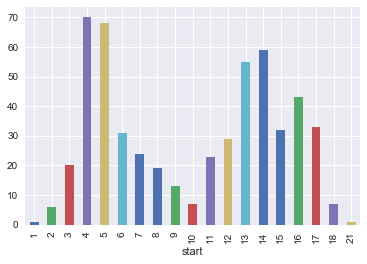

In [89]:
floor['floor'].groupby(floor['start'].dt.hour).count().plot(kind="bar")

The most common hour of climbing start is 4 hours. Without the time offset calculation it would be 8 hours. However it is weird that the individual climbs floors at 4:00 am.

Text(0,0.5,'Frequency')

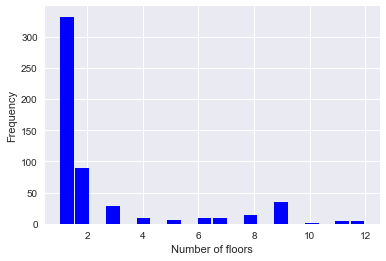

In [90]:
floor['floor'].hist(bins=20, rwidth=0.9,
                   color='blue')
plt.xlabel('Number of floors')
plt.ylabel('Frequency')

The most common number of climbed floors is one. Despite the presence of some outliers, the distribution seems normal.

Unfortunately, this is difficult to analyze these 3 datasets independently especially for heart rate and step data. For the first, the heart rate is measured only once for one minute and for the second, the step is measured for 1 minute while in a realistic situation it is rare to stop the device measurement after only one minute.

This is why we will try to connect all these datasets together in order to see if we can have a more reliable analysis.

In [91]:
# First we create a column named start_date which is the date of the day without any hour, minute or seconds
sleep_data2['start_date']=sleep_data2['start'].dt.date
sleep_data2['start_date']=sleep_data2['start_date'].astype("datetime64")

In [92]:
exercise_data['start_date']=exercise_data['start_time'].dt.date
exercise_data['start_date']=exercise_data['start_date'].astype("datetime64")

In [93]:
heart['start_date']=heart['start'].dt.date
heart['start_date']=heart['start_date'].astype("datetime64")

In [94]:
step_count['start_date']=step_count['start_time'].dt.date
step_count['start_date']=step_count['start_date'].astype("datetime64")

In [95]:
floor['start_date']=floor['start_time'].dt.date
floor['start_date']=floor['start_date'].astype("datetime64")

#### Then we clean all the data removing all useless columns and keep only the data from 2018

In [96]:
regul_sleep.columns

Index(['start_date', 'end_date', 'Minutes_in_bed', 'efficiency',
       'start_ordinal', 'week_day'],
      dtype='object')

In [97]:
sleep_data_b = regul_sleep[['start_date','end_date','efficiency','Minutes_in_bed']]
sleep_clean = sleep_data_b[(sleep_data_b['start_date'].dt.year>=2018)]
sleep_clean['date_time']=sleep_clean['start_date']

C:\Users\MySelf\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [98]:
exercise_data_b = exercise_data.dropna(axis=1)
exercise_data_c = exercise_data_b.drop(['Unnamed: 0','update_time','create_time'],axis=1)
exercise_data_d=exercise_data_c[(exercise_data_c['start_time'].dt.year >=2018)&(exercise_data_c['exercise_type']!=0)].sort_values(by='start_time')
exercise_data_e=pd.DataFrame(exercise_data_d.groupby(['start_date','deviceuuid','type'],as_index=False).agg({'calorie': "sum",
                                     'duration': "sum"}))
exercise_data_f=exercise_data_e.drop_duplicates(['start_date','type'], keep='first')

In [99]:
# We do the sum of calorie and duration for each day
exercise_clean = pd.DataFrame(exercise_data_f[['calorie','duration']].groupby(exercise_data_f['start_date']).sum())
exercise_clean.head()

,calorie,duration
start_date,,
2018-01-01,93.31,1171467
2018-01-03,109.19,1429649
2018-01-04,51.26,681752
2018-01-05,126.00,900000
2018-01-06,564.29,6584100


In [100]:
step_count_b = step_count.drop(['Unnamed: 0','update_time','create_time'],axis=1)

In [101]:
# We do the sum of calorie, count and distance for each day
step_clean = pd.DataFrame(step_count_b[['calorie','count','distance']].groupby(step_count_b['start_date']).sum())
step_clean.sort_values(by='start_date').head()

,calorie,count,distance
start_date,,,
2018-03-31,476.101001,11039,8079.278006
2018-04-01,766.199985,18468,13471.121907
2018-04-02,748.368988,17441,12911.609933
2018-04-03,433.487997,9345,6909.307995
2018-04-04,913.739992,20404,15286.599958


In [102]:
heart_data_b=heart.drop(['Unnamed: 0','binning_data','heart_beat_count','max','min','update_time','create_time'],axis=1)
heart_data_c=heart_data_b[(heart_data_b['start_date'].dt.year>=2018)]

In [103]:
# We calculate the average heart rate per minute for each day
heart_clean=pd.DataFrame(heart_data_c[['heart_rate']].groupby(heart_data_c['start_date']).mean())
heart_clean.head()

,heart_rate
start_date,
2018-01-04,58.333333
2018-01-06,60.666667
2018-01-07,98.666667
2018-01-09,61.000000
2018-01-10,100.250000


Let's add a column named 'distance' because according to the documentation about the device, one floor corresponds to 3 meters

In [104]:
floor['distance']=floor['floor']*3

In [105]:
floor_data_b = floor.drop(['Unnamed: 0','update_time','create_time'],axis=1)
floor_data_c = floor_data_b[(floor['floor']>5)&(floor['start_date'].dt.year>=2018)]

In [106]:
floor_clean=pd.DataFrame(floor_data_c[['floor','distance','duration_in_sec']].groupby(floor_data_c['start_date']).sum())
floor_clean.sort_values(by='floor').head()

,floor,distance,duration_in_sec
start_date,,,
2018-01-03,6.0,18.0,114
2018-01-08,6.0,18.0,88
2018-04-26,6.0,18.0,78
2018-01-27,7.0,21.0,85
2018-04-14,7.0,21.0,88


#### Now let's try to connect all these datasets with the new column Start date which is the day the activities happened and let's see if we get the same values as the summary data

Now with all the cleaned datasets we got, we try to link them using the date of activities

In [107]:
# Let's merge the cleaned exercise and step datasets
exer_step = pd.merge(exercise_clean, step_clean,on='start_date',how='outer',suffixes=['_exer','_step'])
exer_step.fillna(0).head()

,calorie_exer,duration,calorie_step,count,distance
start_date,,,,,
2018-01-01,93.31,1171467.0,0.0,0.0,0.0
2018-01-03,109.19,1429649.0,0.0,0.0,0.0
2018-01-04,51.26,681752.0,0.0,0.0,0.0
2018-01-05,126.00,900000.0,0.0,0.0,0.0
2018-01-06,564.29,6584100.0,0.0,0.0,0.0


In [108]:
# Let's merge the exercise and floor_clean
ex_ste_floor =pd.merge(exer_step, floor_clean,on='start_date',how='outer',suffixes=['_exst','_floor'])
ex_ste_floor['duration_floor']=ex_ste_floor['duration_in_sec']*1000
ex_ste_floor.fillna(0).head()

,calorie_exer,duration,calorie_step,count,distance_exst,floor,distance_floor,duration_in_sec,duration_floor
start_date,,,,,,,,,
2018-01-01,93.31,1171467.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-03,109.19,1429649.0,0.0,0.0,0.0,6.0,18.0,114.0,114000.0
2018-01-04,51.26,681752.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-05,126.00,900000.0,0.0,0.0,0.0,8.0,24.0,104.0,104000.0
2018-01-06,564.29,6584100.0,0.0,0.0,0.0,28.0,84.0,338.0,338000.0


In [109]:
# let's merge this previous dataset with the heart data
ex_and_heart=pd.merge(ex_ste_floor, heart_clean,on='start_date')

In [110]:
# Finally let's merge this previous dataset with the sleep data
sleep_and_others=pd.merge(ex_ste_floor, sleep_clean,on='start_date',suffixes=['_other','_sleep'])
sleep_and_ot=sleep_and_others.fillna(0)

In [111]:
# We add all the calorie columns, all the distance columns and all the active duration columns
sleep_and_ot['calorie_all']=sleep_and_ot['calorie_exer']+sleep_and_ot['calorie_step']
sleep_and_ot['active_duration']=sleep_and_ot['duration']+sleep_and_ot['duration_floor']
sleep_and_ot['total_distance']=sleep_and_ot['distance_exst']+sleep_and_ot['distance_floor']
# Let's convert sleep duration in nanoseconds
sleep_and_ot['sleep_duration']=sleep_and_ot['Minutes_in_bed']*60*1000
# Let's make the final dataset with all the previous datasets connected
sleep_and_co=sleep_and_ot.drop(['Minutes_in_bed','duration_in_sec','calorie_exer','calorie_step','duration','duration_floor','distance_exst','distance_floor'],axis=1)
sleep_and_co['date_time']=sleep_and_co['start_date']
sleep_and_co.sort_values(by='start_date').head()

,start_date,count,floor,end_date,efficiency,date_time,calorie_all,active_duration,total_distance,sleep_duration
0,2018-01-01,0.0,0.0,2018-01-01,92.400000,2018-01-01,93.31,1171467.0,0.0,14940000.0
1,2018-01-03,0.0,6.0,2018-01-03,31.619050,2018-01-03,109.19,1543649.0,18.0,22500000.0
2,2018-01-04,0.0,0.0,2018-01-04,92.056076,2018-01-04,51.26,681752.0,0.0,25680000.0
3,2018-01-05,0.0,8.0,2018-01-05,93.750000,2018-01-05,126.00,1004000.0,24.0,31620000.0
4,2018-01-06,0.0,28.0,2018-01-06,92.214530,2018-01-06,564.29,6922100.0,84.0,34680000.0


In [112]:
# Let's see the correlation between all the variables
sleep_and_co.corr()

,count,floor,efficiency,calorie_all,active_duration,total_distance,sleep_duration
count,1.000000,-0.200925,0.058333,0.918704,-0.119178,0.999838,-0.251520
floor,-0.200925,1.000000,-0.054071,-0.250391,-0.090673,-0.201213,0.128173
efficiency,0.058333,-0.054071,1.000000,0.032462,-0.044280,0.057786,0.486823
calorie_all,0.918704,-0.250391,0.032462,1.000000,0.234379,0.917997,-0.272958
active_duration,-0.119178,-0.090673,-0.044280,0.234379,1.000000,-0.121508,-0.061880
total_distance,0.999838,-0.201213,0.057786,0.917997,-0.121508,1.000000,-0.250821
sleep_duration,-0.251520,0.128173,0.486823,-0.272958,-0.061880,-0.250821,1.000000


There is a weak correlation between the sleep duration and the other activities

Now let's compare the dataframe we got with columns of summary data

In [113]:
# We choose day_time as reference date since it's the day when the activity happened
summary_data['date_time'] = pd.to_datetime(summary_data['day_time'], unit='ms')

In [114]:
compare = pd.merge(sleep_and_co, summary_data, on='date_time')
compare[['date_time','calorie','calorie_all','distance','total_distance']].head()

,date_time,calorie,calorie_all,distance,total_distance
0,2018-01-01,400.73788,93.31,6834.1580,0.0
1,2018-01-03,971.60400,109.19,6962.8965,18.0
2,2018-01-04,477.15380,51.26,8308.2020,0.0
3,2018-01-05,576.35180,126.00,2906.1500,24.0
4,2018-01-06,854.36664,564.29,10750.0260,84.0


Unfortunately, despite all our efforts, we still don't get the same values between the connected data and the summary data for the same dates. But we can still use the summary data in order to do the following analysis. 

## Part 5 : Summary data Analysis

In [115]:
summary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 19 columns):
create_time            705 non-null object
longest_idle_time      705 non-null int64
score                  705 non-null int64
extra_data             705 non-null object
goal                   705 non-null int64
calorie                705 non-null float64
run_time               705 non-null int64
deviceuuid             705 non-null object
update_time            705 non-null object
longest_active_time    705 non-null int64
day_time               705 non-null int64
walk_time              705 non-null int64
pkg_name               705 non-null object
active_time            705 non-null int64
distance               705 non-null float64
others_time            705 non-null int64
step_count             705 non-null int64
datauuid               705 non-null object
date_time              705 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(10), object(6)
memory usage: 104.

In [116]:
summary_data.sort_values(by='date_time', ascending=False).head()

,create_time,longest_idle_time,score,extra_data,goal,calorie,run_time,deviceuuid,update_time,longest_active_time,day_time,walk_time,pkg_name,active_time,distance,others_time,step_count,datauuid,date_time
588,2018-05-03 04:00:02.318,19560000,0,d39ef639-2045-40f4-a78d-c013bcc25e59.extra_dat...,-1,638.40186,82556,jQfnryI8/B,2018-05-04 10:45:47.329,634790,1525305600000,8952719,com.sec.android.app.shealth,9035275,11087.7980,0,14602,d39ef639-2045-40f4-a78d-c013bcc25e59,2018-05-03
284,2018-05-02 04:00:57.110,12120000,0,67c2550e-9dc6-4f89-86d1-6425c9742e4a.extra_dat...,-1,539.96910,72398,jQfnryI8/B,2018-05-03 12:50:14.675,831210,1525219200000,7901526,com.sec.android.app.shealth,7973924,9257.1140,0,12557,67c2550e-9dc6-4f89-86d1-6425c9742e4a,2018-05-02
19,2018-05-01 04:00:00.398,15180000,0,0734b3df-837c-4fe1-a9f4-028f909c0327.extra_dat...,-1,567.31680,2400,jQfnryI8/B,2018-05-02 18:48:28.857,2400000,1525132800000,3434906,com.sec.android.app.shealth,5837306,3886.3113,2400000,5427,0734b3df-837c-4fe1-a9f4-028f909c0327,2018-05-01
535,2018-04-30 04:00:37.615,21000000,0,c05b9557-8121-4cb8-8b13-8b1c9dbc3a25.extra_dat...,-1,456.98540,39952,jQfnryI8/B,2018-05-01 10:57:07.881,630046,1525046400000,6277504,com.sec.android.app.shealth,6317456,7584.9150,0,10344,c05b9557-8121-4cb8-8b13-8b1c9dbc3a25,2018-04-30
184,2018-04-29 04:00:01.013,18660000,0,3edff0d9-b0e6-484b-aec5-9f84bacd7062.extra_dat...,-1,427.69882,12390,jQfnryI8/B,2018-04-30 11:44:26.584,1800000,1524960000000,2684919,com.sec.android.app.shealth,4497309,3003.3796,1800000,4159,3edff0d9-b0e6-484b-aec5-9f84bacd7062,2018-04-29


In [117]:
summary_data.index = pd.to_datetime(summary_data['date_time'])

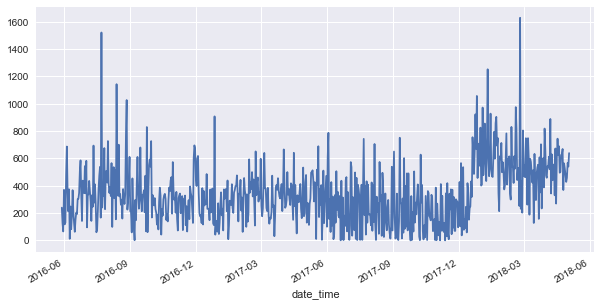

In [118]:
fig, ax = plt.subplots(figsize=(10,5))
summary_data['calorie'].plot()

We have calorie measurements within 2 years, from the end of May 2016 until June 2018. The device user seems to have burnt more calories in 2018 than in the previous years. Number of burnt calories ossilates between 0 and 1628.

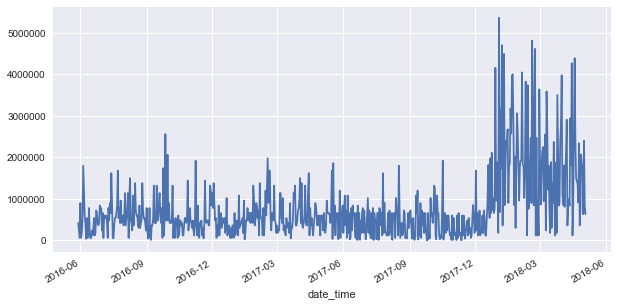

In [119]:
fig, ax = plt.subplots(figsize=(10,5))
summary_data['longest_active_time'].plot()

The timeline is the same as the calorie time series. Like the calorie plot, the longest active time seems to be higher in 2018 than in 2016 or 2017. 

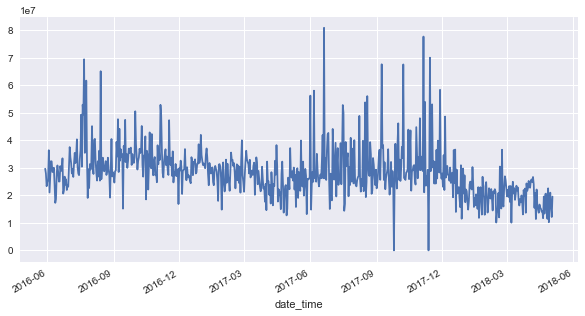

In [120]:
fig, ax = plt.subplots(figsize=(10,5))
summary_data['longest_idle_time'].plot()

The idle time is slightly lower in 2018 than in the previous years which is logical if the user is very active this year.

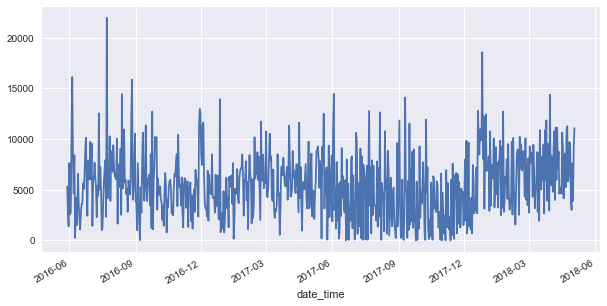

In [121]:
fig, ax = plt.subplots(figsize=(10,5))
summary_data['distance'].plot()

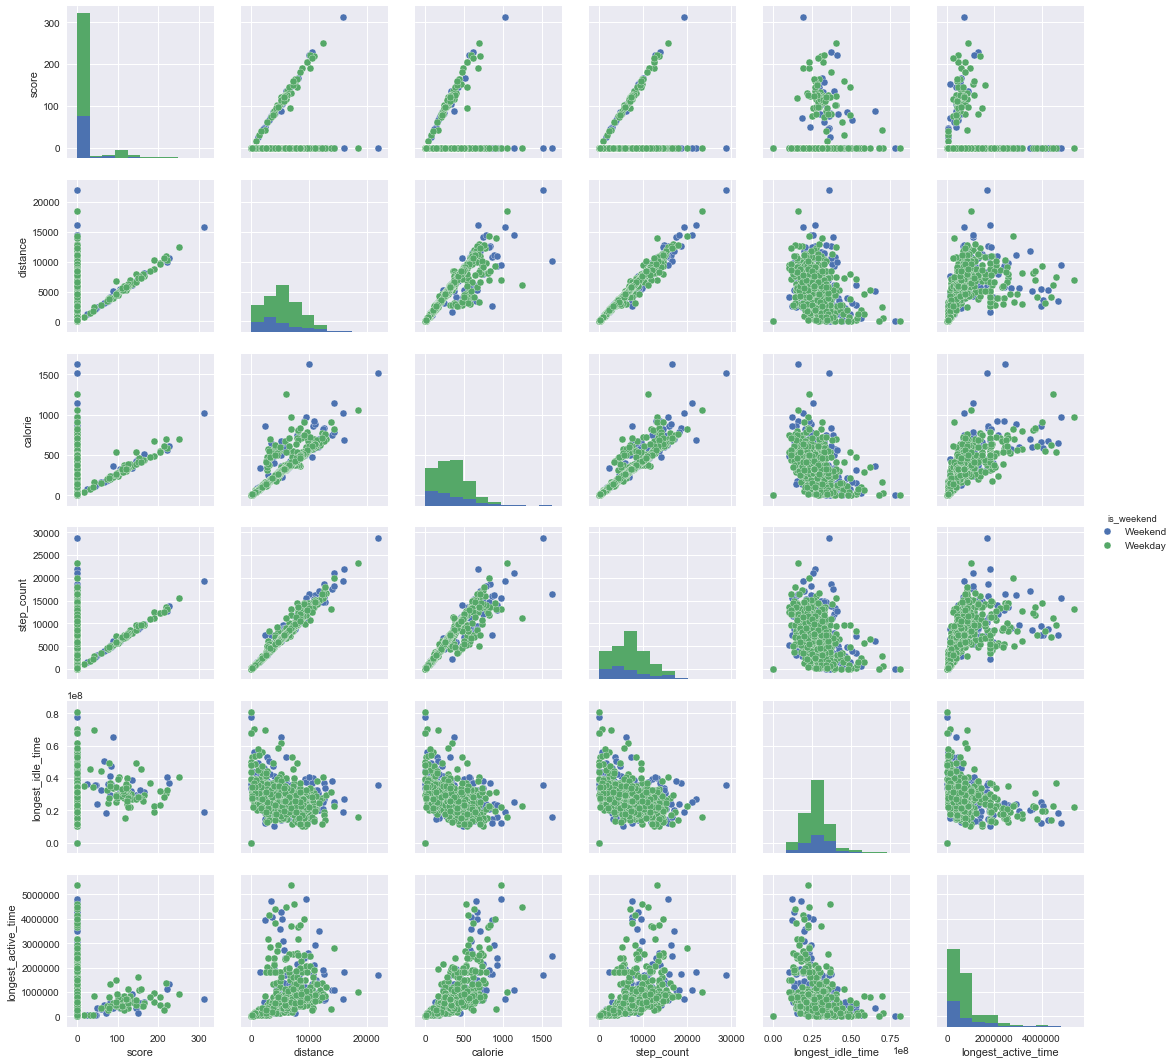

In [122]:
summary_data['day_name'] = summary_data['date_time'].dt.weekday_name
summary_data['is_weekend'] = summary_data['day_name'].map(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')
sb.pairplot(hue = 'is_weekend', data = summary_data[['score','distance', 'calorie', 'step_count','longest_idle_time','longest_active_time','day_name', 'is_weekend']])

The user device seems to be less active on weekends than on weekdays.

In [123]:
summary_data[['distance', 'calorie','longest_idle_time','longest_active_time']].corr()

,distance,calorie,longest_idle_time,longest_active_time
distance,1.000000,0.872684,-0.335707,0.375903
calorie,0.872684,1.000000,-0.409610,0.678902
longest_idle_time,-0.335707,-0.409610,1.000000,-0.340997
longest_active_time,0.375903,0.678902,-0.340997,1.000000


Two strong correlations can be seen :

- one between the longest active time and the number of burned calories
- another the distance and the number of burned calories

#### Let's check the stationarity of these four time series with the Dickey-Fuller test

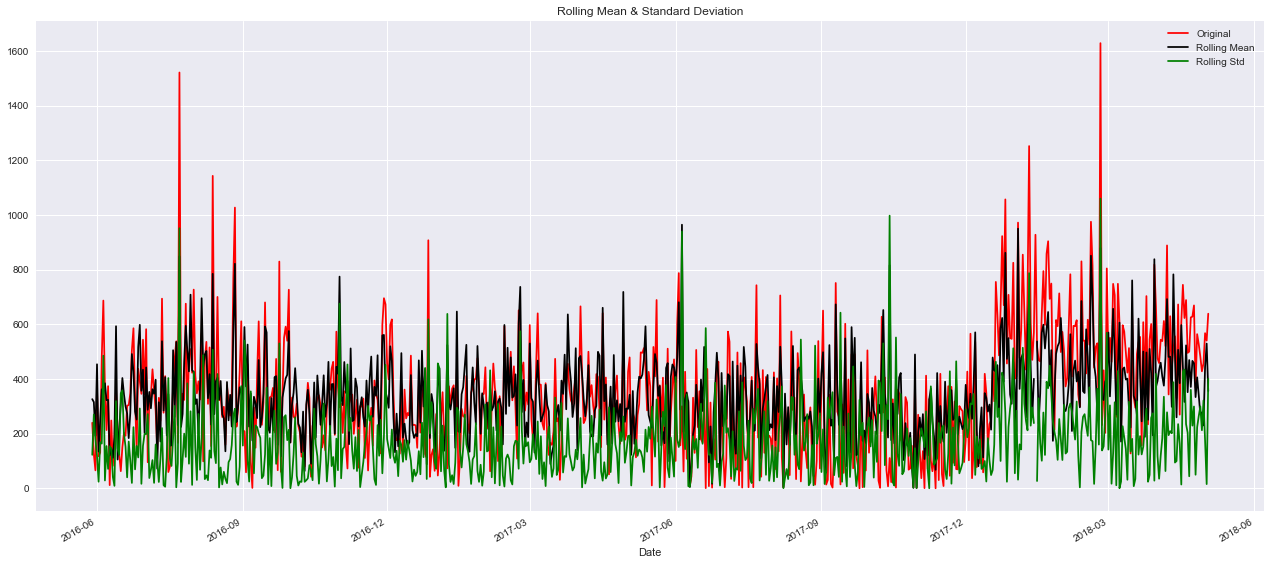

Test statistic:  -17.623825840156314
p-value:  3.8272297545970586e-30
Critical Values: {'1%': -3.4396995339981444, '5%': -2.8656659438580796, '10%': -2.5689671530263554}


In [124]:
# adfuller library 
from statsmodels.tsa.stattools import adfuller
# check_adfuller
def check_adfuller(ts):
    # Dickey-Fuller test
    result = adfuller(ts, autolag='AIC')
    print('Test statistic: ' , result[0])
    print('p-value: '  ,result[1])
    print('Critical Values:' ,result[4])
# check_mean_std
def check_mean_std(ts):
    #Rolling statistics
    rolmean = ts.rolling(2).mean()
    rolstd = ts.rolling(2).std()
    plt.figure(figsize=(22,10))   
    orig = ts.plot(color='red',label='Original')
    mean = rolmean.plot(color='black', label='Rolling Mean')
    std = rolstd.plot(color='green', label = 'Rolling Std')
    plt.xlabel("Date")
    plt.title('Rolling Mean & Standard Deviation')
    plt.legend()
    plt.show()
    
# check stationary: mean, variance(std)and adfuller test
check_mean_std(summary_data.calorie)
check_adfuller(summary_data.calorie)

According to the Dickey-Fuller test, since the value of the test statistic is largely lower than the critical values, we can conclude
that the time series of calorie is a stationary time series

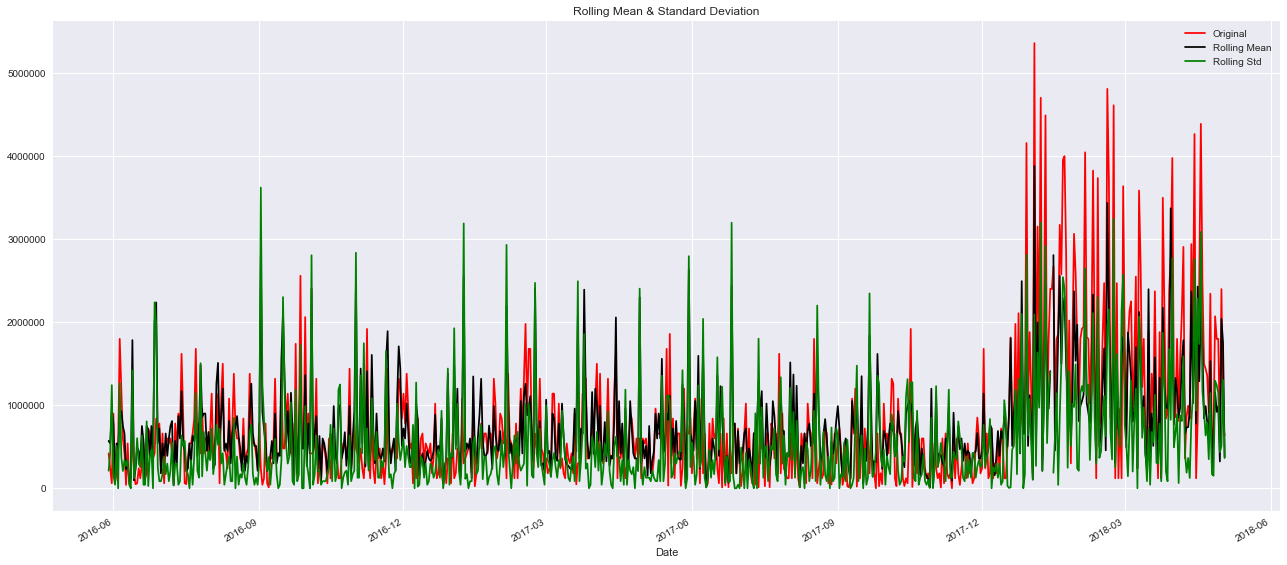

Test statistic:  -10.929947584862617
p-value:  9.881128406804531e-20
Critical Values: {'1%': -3.439766853257416, '5%': -2.8656956054873377, '10%': -2.5689829557089308}


In [125]:
check_mean_std(summary_data.longest_active_time)
check_adfuller(summary_data.longest_active_time)

According to the Dickey-Fuller test, since the value of the test statistic is largely lower than the critical values, we can conclude that the time series of longest active time is also a stationary time series

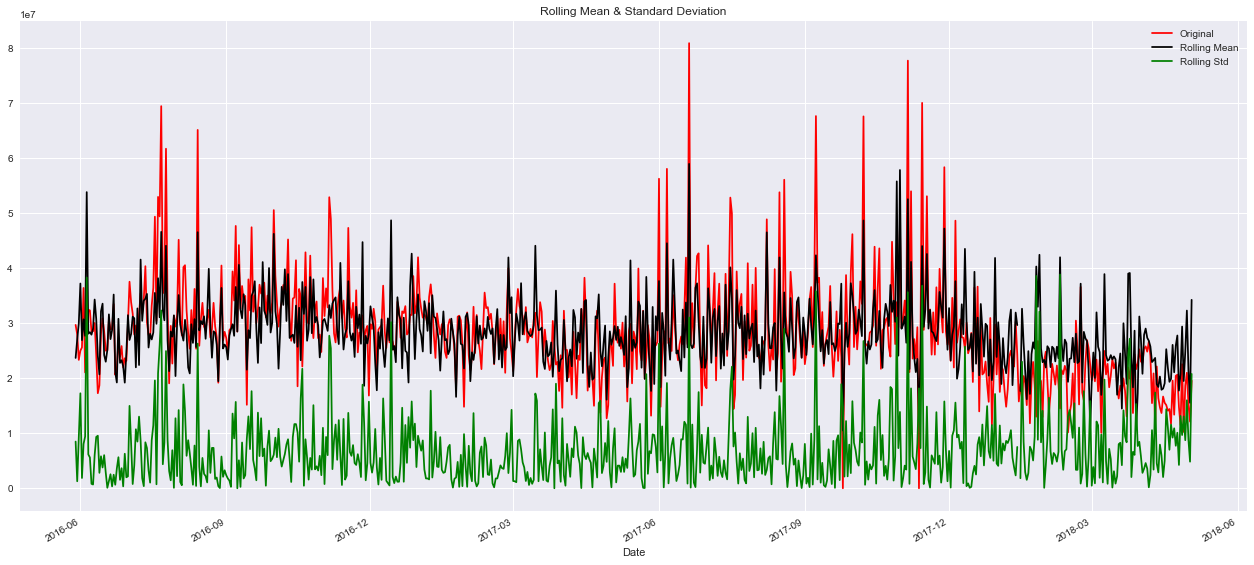

Test statistic:  -27.948494016881337
p-value:  0.0
Critical Values: {'1%': -3.4396728750301966, '5%': -2.8656541974330936, '10%': -2.5689608949670713}


In [126]:
check_mean_std(summary_data.longest_idle_time)
check_adfuller(summary_data.longest_idle_time)

Since the value of the test statistic is also largely lower than the critical values, the time series of longest idle time is also a stationary time series.

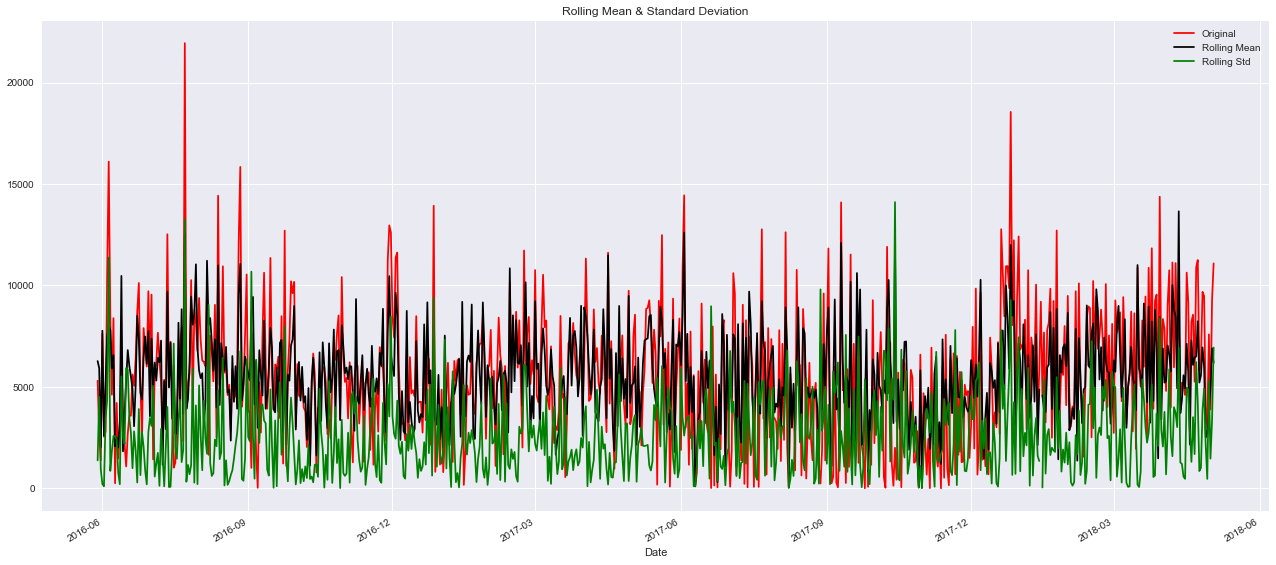

Test statistic:  -18.044738167534714
p-value:  2.6509073844713033e-30
Critical Values: {'1%': -3.4396995339981444, '5%': -2.8656659438580796, '10%': -2.5689671530263554}


In [127]:
check_mean_std(summary_data.distance)
check_adfuller(summary_data.distance)

Since the value of the test statistic is also largely lower than the critical values, the time series of distance is also a stationary time series.
Now let's see how all these time series are autocorrelated.

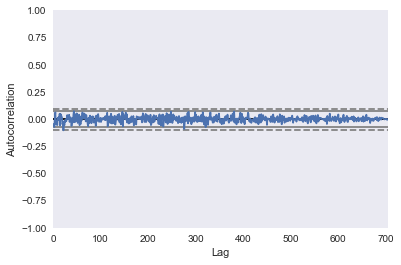

In [128]:
pd.plotting.autocorrelation_plot(summary_data.calorie)

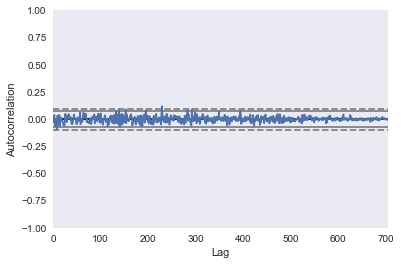

In [129]:
pd.plotting.autocorrelation_plot(summary_data.longest_active_time)

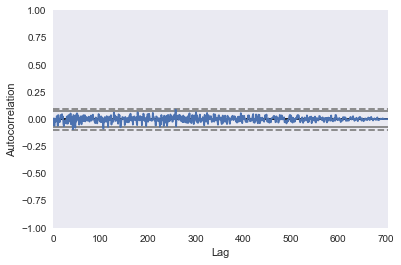

In [130]:
pd.plotting.autocorrelation_plot(summary_data.longest_idle_time)

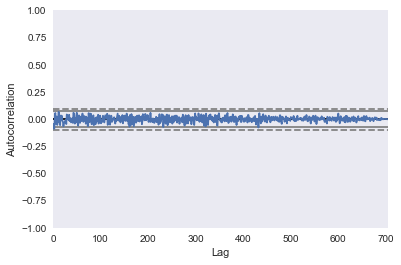

In [131]:
pd.plotting.autocorrelation_plot(summary_data.distance)

Since there are no peak in correlation in all the four time series, there is no apparent seasonality.

Now let's merge this summary data with sleep so we can see if all these activities affect the sleep characteristics.

In [132]:
sleep_summary=pd.merge(summary_data, sleep_clean, on='date_time')
sleep_summary.index = pd.to_datetime(sleep_summary['date_time'])
sleep_summary.head()

C:\Users\MySelf\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2963: FutureWarning: 'date_time' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  exec(code_obj, self.user_global_ns, self.user_ns)


,create_time,longest_idle_time,score,extra_data,goal,calorie,run_time,deviceuuid,update_time,longest_active_time,...,others_time,step_count,datauuid,date_time,day_name,is_weekend,start_date,end_date,efficiency,Minutes_in_bed
date_time,,,,,,,,,,,,,,,,,,,,,
2018-01-14,2018-01-14 05:00:56.527,15780000,0,00179515-d385-4f61-81a7-2ddd68ac80b2.extra_dat...,-1,927.15780,76845,jQfnryI8/B,2018-01-15 12:48:58.842,2400000,...,2400000,12889,00179515-d385-4f61-81a7-2ddd68ac80b2,2018-01-14,Sunday,Weekend,2018-01-14,2018-01-14,41.666665,45.0
2018-01-14,2018-01-14 05:00:56.527,15780000,0,00179515-d385-4f61-81a7-2ddd68ac80b2.extra_dat...,-1,927.15780,76845,jQfnryI8/B,2018-01-15 12:48:58.842,2400000,...,2400000,12889,00179515-d385-4f61-81a7-2ddd68ac80b2,2018-01-14,Sunday,Weekend,2018-01-14,2018-01-15,91.428570,384.0
2018-01-03,2018-01-03 05:03:32.135,22140000,0,003f0597-41ad-4f7f-bd02-6683076a1535.extra_dat...,-1,971.60400,43840,jQfnryI8/B,2018-01-04 11:41:12.193,5363575,...,6217727,13135,003f0597-41ad-4f7f-bd02-6683076a1535,2018-01-03,Wednesday,Weekday,2018-01-03,2018-01-03,31.619050,375.0
2018-04-28,2018-04-28 04:00:42.119,10260000,0,04bc69a5-0962-44c0-acc9-ea9a54bc380b.extra_dat...,-1,481.86008,32658,jQfnryI8/B,2018-04-30 11:44:26.394,1800000,...,1800000,5330,04bc69a5-0962-44c0-acc9-ea9a54bc380b,2018-04-28,Saturday,Weekend,2018-04-28,2018-04-28,46.464645,116.0
2018-01-06,2018-01-06 05:00:01.668,14820000,0,0552bfd9-64f5-4eb3-8355-c0ddee270f92.extra_dat...,-1,854.36664,89085,jQfnryI8/B,2018-01-07 14:34:08.600,1734242,...,1200000,15964,0552bfd9-64f5-4eb3-8355-c0ddee270f92,2018-01-06,Saturday,Weekend,2018-01-06,2018-01-06,92.214530,578.0


In [133]:
sleep_summary.shape

(135, 25)

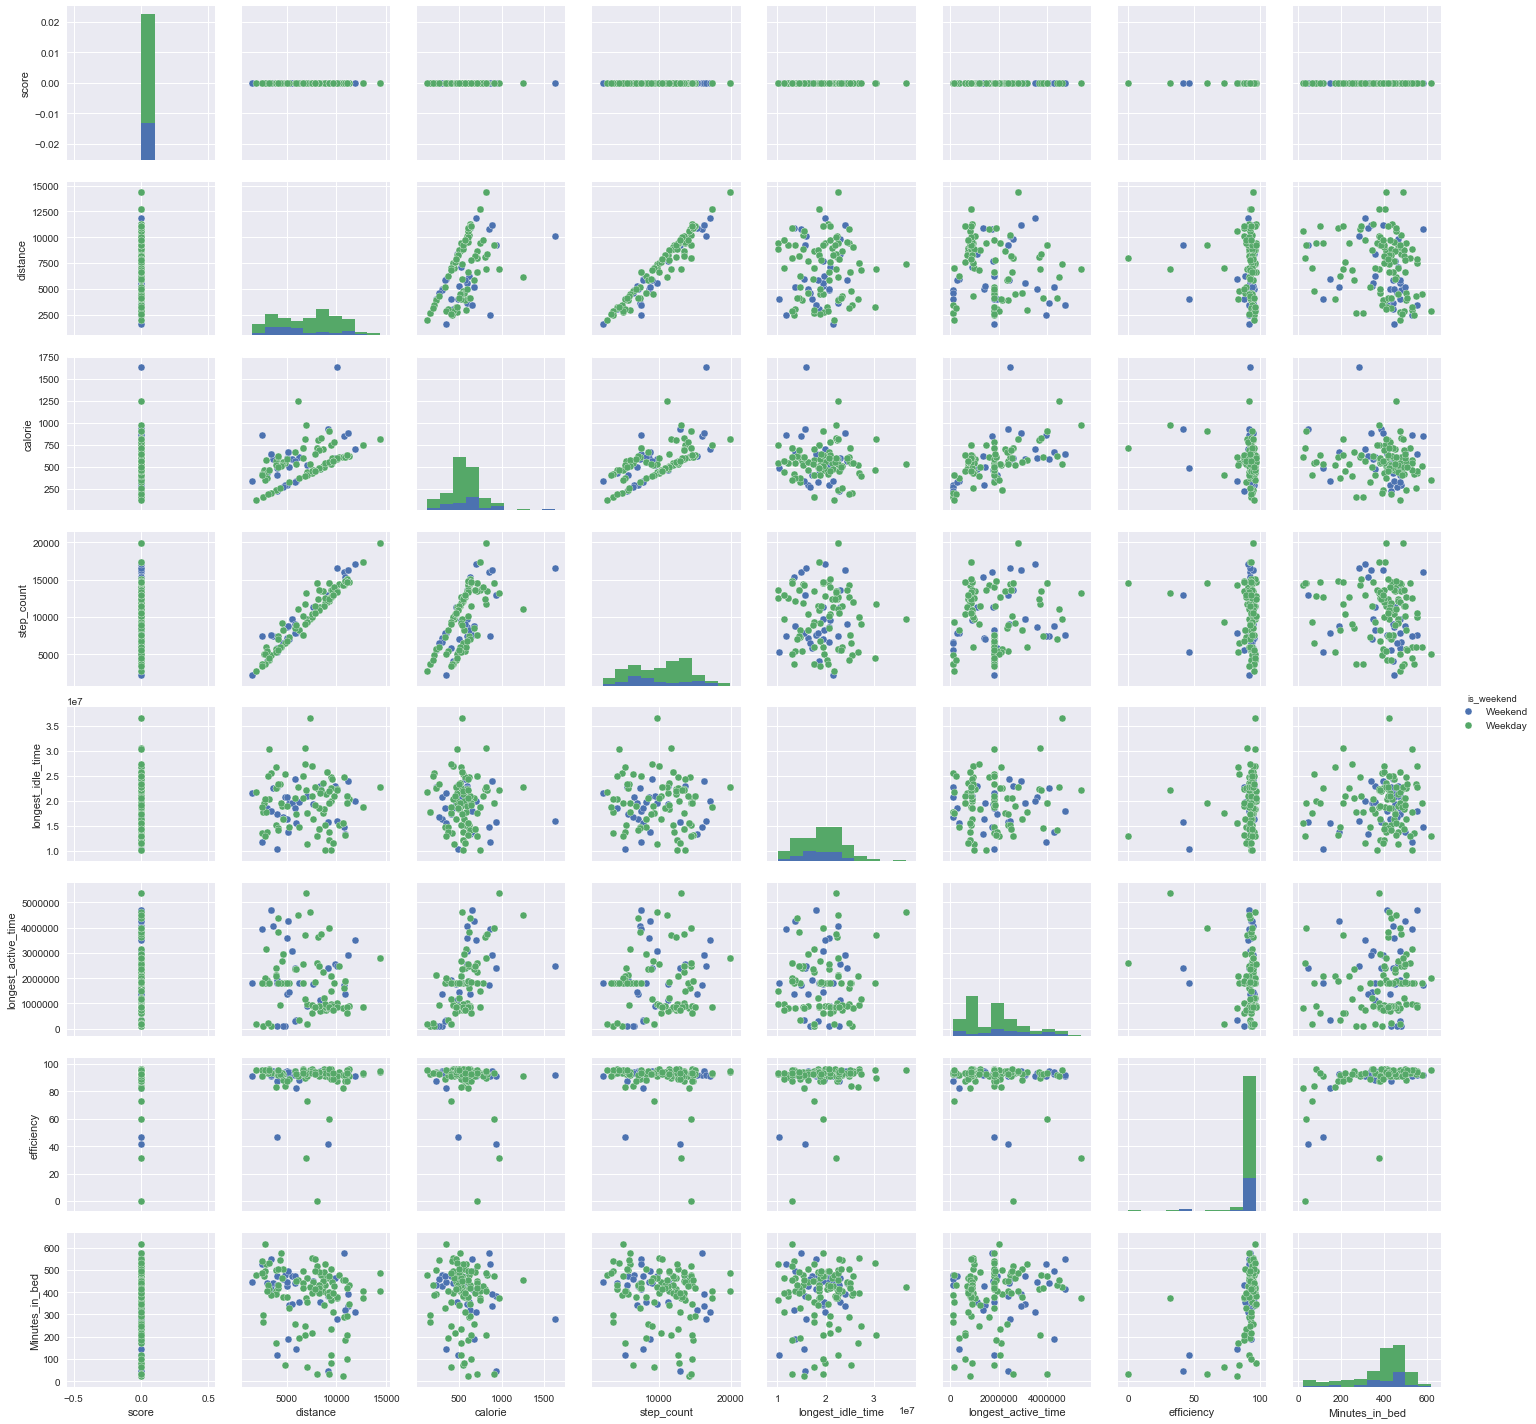

In [134]:
sleep_summary['day_name'] = sleep_summary['date_time'].dt.weekday_name
sleep_summary['is_weekend'] = sleep_summary['day_name'].map(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')
sb.pairplot(hue = 'is_weekend', data = sleep_summary[['score','distance', 'calorie', 'step_count','longest_idle_time','longest_active_time','efficiency','Minutes_in_bed','day_name', 'is_weekend']])

In [135]:
sleep_summary[['distance', 'calorie', 'step_count','longest_idle_time','longest_active_time','efficiency','Minutes_in_bed','day_name', 'is_weekend']].corr()

,distance,calorie,step_count,longest_idle_time,longest_active_time,efficiency,Minutes_in_bed
distance,1.000000,0.499452,0.962114,0.002594,-0.145796,-0.024631,-0.218621
calorie,0.499452,1.000000,0.638800,-0.061811,0.551153,-0.197208,-0.115716
step_count,0.962114,0.638800,1.000000,-0.058869,0.056849,-0.097951,-0.189187
longest_idle_time,0.002594,-0.061811,-0.058869,1.000000,0.023219,0.172181,0.041563
longest_active_time,-0.145796,0.551153,0.056849,0.023219,1.000000,-0.174988,0.088269
efficiency,-0.024631,-0.197208,-0.097951,0.172181,-0.174988,1.000000,0.492639
Minutes_in_bed,-0.218621,-0.115716,-0.189187,0.041563,0.088269,0.492639,1.000000


There seems to be no apparent correlation between the sleep duration, the sleep quality (efficiency) and the other variables. Consequently it is hard to say if the sleep duration and the efficiency are affected by the intensity of activity. On the other hand, the sample of data is small (only 135 rows).

Now let's see if the time series of duration and efficiency are stationary.

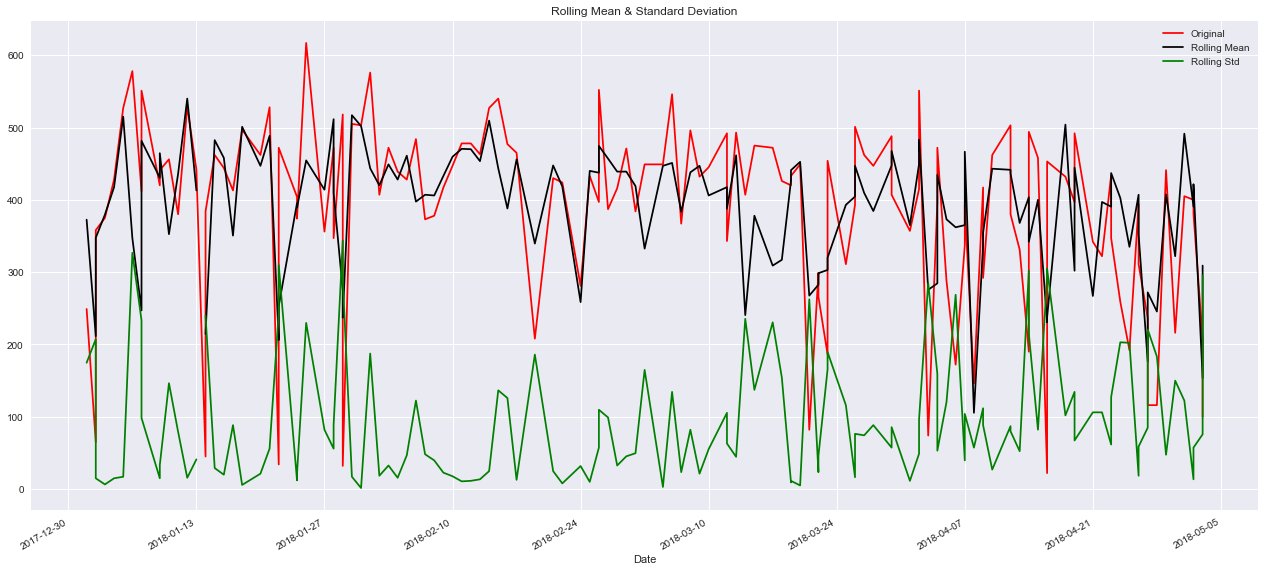

Test statistic:  -7.445661682476207
p-value:  5.847651507132544e-11
Critical Values: {'1%': -3.480500383888377, '5%': -2.8835279559405045, '10%': -2.578495716547007}


In [136]:
check_mean_std(sleep_summary['Minutes_in_bed'])
check_adfuller(sleep_summary['Minutes_in_bed'])

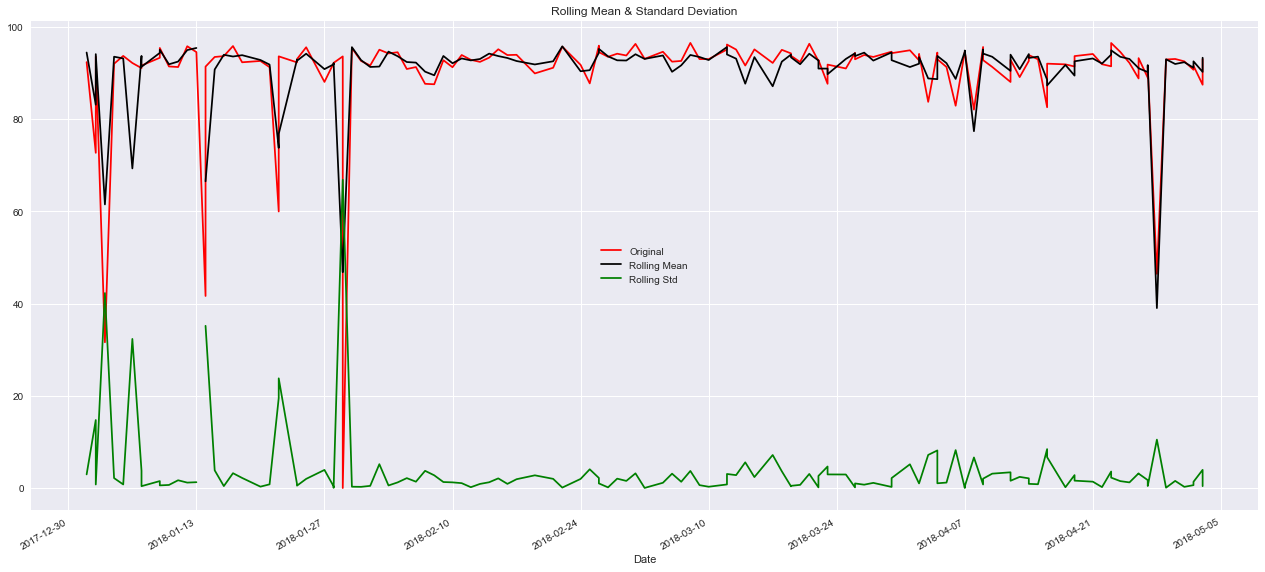

Test statistic:  -10.831638540486994
p-value:  1.7022192133057834e-19
Critical Values: {'1%': -3.480118600110386, '5%': -2.8833618426136196, '10%': -2.578407034974382}


In [137]:
check_mean_std(sleep_summary['efficiency'])
check_adfuller(sleep_summary['efficiency'])

For both time series, the test statistic is lower than all the critical values. So these time series are also stationary.
Now let's see how all these time series are autocorrelated.

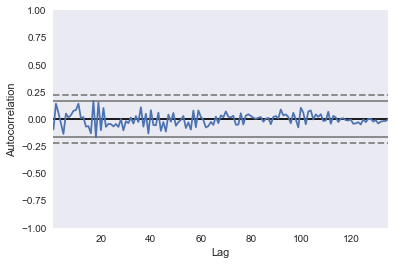

In [138]:
pd.plotting.autocorrelation_plot(sleep_summary['Minutes_in_bed'])

Although there are peaks in this plot, they don't go beyond the dotted lines. We can't conclude about any seasonality

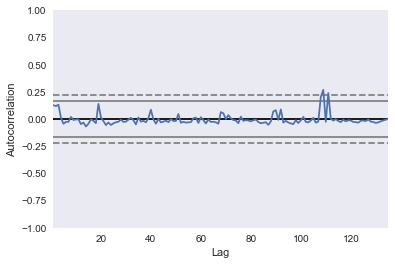

In [139]:
pd.plotting.autocorrelation_plot(sleep_summary['efficiency'])

There is a peak at day 110 that goes beyond the dotted line. However that doesn't mean the sleep quality changes every 110 days because the number of measured days is too small.